<a href="https://colab.research.google.com/github/ColeJMitchell/machine-learning-stock-prediction/blob/main/data_collection_notebooks/general_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 0: Setup

In [ ]:

# Import Packages
import pyarrow, os
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
assert np.__version__ == "2.1.0", f"Expected numpy version 2.1.0, but got {np.__version__}"

from autoviz import AutoViz_Class
%matplotlib inline

# Check if running in Google Colab
def is_colab():
    from IPython import get_ipython
    return get_ipython().__class__.__module__ == "google.colab._shell"

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


## Part 1: Read Collected Reddit Data

In [ ]:
# Save the collected data to parquet format
SUBMISSION_PARQUET_PATH = '../data/wallstreetbets-collection-wss.parquet'

# Verify that the path exists
if not os.path.exists(SUBMISSION_PARQUET_PATH):
    print(f"Error: The file {SUBMISSION_PARQUET_PATH} does not exist.")

# Create a pyarrow schema for the data types.
submission_schema = pyarrow.schema([
    ('title', pyarrow.string()),
    ('created_utc', pyarrow.float64()),
    ('id', pyarrow.string()),
    ('is_original_content', pyarrow.bool_()),
    ('link_flair_text', pyarrow.string()),
    ('locked', pyarrow.bool_()),
    ('name', pyarrow.string()),
    ('num_comments', pyarrow.int64()),
    ('over_18', pyarrow.bool_()),
    ('permalink', pyarrow.string()),
    ('selftext', pyarrow.string()),
    ('spoiler', pyarrow.bool_()),
    ('upvote_ratio', pyarrow.float64()),
    ('ss_neg', pyarrow.float64()),
    ('ss_neu', pyarrow.float64()),
    ('ss_pos', pyarrow.float64()),
    ('ss_compound', pyarrow.float64())
])

# Read the parquet file into a pandas DataFrame using the schema.
submission_collection = pd.read_parquet(SUBMISSION_PARQUET_PATH, engine='pyarrow', schema=submission_schema)

In [ ]:
# Show the first few rows of the DataFrame
display(submission_collection.head())

title                                                                      \
0                                                                                                                                   Nivea Along   
1                                                                                  Powell to Volatile Stock Market: You’re on Your Own, for Now   
2                                                                                                    Made back the last Wendy’s paycheck I lost   
3  After market observation. When I finished buying, I saw that the air line was changing. I thought the combination of both sides was more rea   
4                                                                                                                                       Ominous   

    created_utc    id     is_original_content link_flair_text  locked  \
0  1.744832e+09  1k0t4jk         False                 YOLO     False   
1  1.744836e+09  1k0unbq         False                 News     False   
2  1.744834e+09  1k0tv2y         False                 Gain     False   
3  1.744833e+09  1k0tnqx         False                 Gain     False   
4  1.744833e+09  1k0thnd         False           Discussion     False   

      name     num_comments  over_18  \
0  t3_1k0t4jk         5       False    
1  t3_1k0unbq         2       False    
2  t3_1k0tv2y         6       False    
3  t3_1k0tnqx         8       False    
4  t3_1k0thnd       110       False    

                                        permalink                                         \
0                                        /r/wallstreetbets/comments/1k0t4jk/nivea_along/   
1  /r/wallstreetbets/comments/1k0unbq/powell_to_volatile_stock_market_youre_on_your_own/   
2          /r/wallstreetbets/comments/1k0tv2y/made_back_the_last_wendys_paycheck_i_lost/   
3  /r/wallstreetbets/comments/1k0tnqx/after_market_observation_when_i_finished_buying_i/   
4                                            /r/wallstreetbets/comments/1k0thnd/ominous/   

                                                                                                                                                                                                                                                                          selftext                                                                                                                                                                                                                                                                          \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      After -7% yesterday and -10% today    
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# Save the collected data to parquet format
COMMENT_PARQUET_PATH = '../data/wallstreetbets-comment-collection-wss.parquet'

# Verify that the path exists
if not os.path.exists(COMMENT_PARQUET_PATH):
    print(f"Error: The file {COMMENT_PARQUET_PATH} does not exist.")

# Create a pyarrow schema for the comment data
comment_schema = pyarrow.schema([
    ('parent_post_id', pyarrow.string()),
    ('parent_comment_id', pyarrow.string()),
    ('comment_id', pyarrow.string()),
    ('author', pyarrow.string()),
    ('created_utc', pyarrow.float64()),
    ('score', pyarrow.int64()),
    ('body', pyarrow.string()),
    ('ss_neg', pyarrow.float64()),
    ('ss_neu', pyarrow.float64()),
    ('ss_pos', pyarrow.float64()),
    ('ss_compound', pyarrow.float64())
])

# Read the parquet file into a pandas DataFrame using the schema.
comment_collection = pd.read_parquet(COMMENT_PARQUET_PATH, engine='pyarrow', schema=comment_schema)

In [ ]:

# Show the first few rows of the DataFrame
display(comment_collection.head())

parent_post_id parent_comment_id comment_id        author         \
0     1jwqbs7        t1_mmq5ys9      mmr2q1q   JazzlikePackage5128   
1     1jwqbs7        t1_mmumxfs      mn0wa66        shmoopdoop6969   
2     1jwqbs7        t1_mn0gfl4      mnavkz2       diggin-the-doge   
3     1jwqbs7        t1_mmxdo0h      mmzwh9l          Hugheston987   
4     1jwqbs7        t1_mmplbah      mmsxb6r            markHart99   

    created_utc  score  \
0  1.744474e+09    1     
1  1.744615e+09    1     
2  1.744752e+09    1     
3  1.744597e+09    1     
4  1.744496e+09    1     

                                 body                                ss_neg  \
0                                                                Ty    0.0    
1                                                               why    0.0    
2  I take it all back. Tim Dillon special just released on Netflix.    0.0    
3                                      ![img](emote|t5_2th52|58355)    0.0    
4                                       ![img](emote|t5_2th52|4258)    0.0    

   ss_neu  ss_pos  ss_compound  
0   0.00    1.00     0.3818     
1   0.00    0.00     0.0000     
2   0.69    0.31     0.4019     
3   1.00    0.00     0.0000     
4   1.00    0.00     0.0000

In [ ]:
# Creare a final schema for the merged dataset.
merged_schema = pyarrow.schema([
    ('title', pyarrow.string()),
    ('upvote_ratio', pyarrow.float64()),
    ('id', pyarrow.string()),
    ('permalink', pyarrow.string()),
    ('num_comments', pyarrow.int64()),
    ('created_utc', pyarrow.float64()),
    ('selftext', pyarrow.string())
])

# Save the merged dataset to parquet format.
MERGED_DATASET_PATH = '../data/merged-reddit-wsb.parquet'
merged_dataset = pd.read_parquet(MERGED_DATASET_PATH, engine='pyarrow', schema=merged_schema)

## Part 2: Initial Analysis

In [ ]:
def visualize_data(collection, save_path=None):
    if collection.empty:
        print("Error: The input DataFrame is empty.")
        return None

    AV = AutoViz_Class()
    df_av = collection.copy()
    df_av.dropna(inplace=True)

    if df_av.empty:
        print("Error: The processed DataFrame is empty after dropping columns and NaN values.")
        return None

    try:
        df_av['created_utc'] = pd.to_datetime(df_av['created_utc'], unit='s')
        df_av['created_utc'] = df_av['created_utc'].dt.date
        AV.AutoViz(filename="",
                   dfte=df_av,
                   verbose=2,
                   lowess=True,
                   chart_format="png",
                   save_plot_dir=save_path)
        plt.show()
        plt.close()
    except AttributeError as e:
        print(f"AutoViz encountered an error: {e}")
        return None

    return df_av

Shape of your Data Set loaded: (1714, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['upvote_ratio', 'ss_neg', 'ss_neu', 'ss_pos', 'ss_compound']
    Integer-Categorical Columns: ['num_comments']
    String-Categorical Columns: ['link_flair_text', 'created_utc']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: ['title', 'permalink', 'selftext']
    Date Time Columns: []
    ID Columns: ['id', 'name']
    Columns that will not be considered in modeling: ['is_original_content', 'locked', 'over_18', 'spoiler']
    17 Predictors classified...
        6 variable(

Using Lowess Smoothing. This might take a few minutes for large data sets...
Number of All Scatter Plots = 15


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!

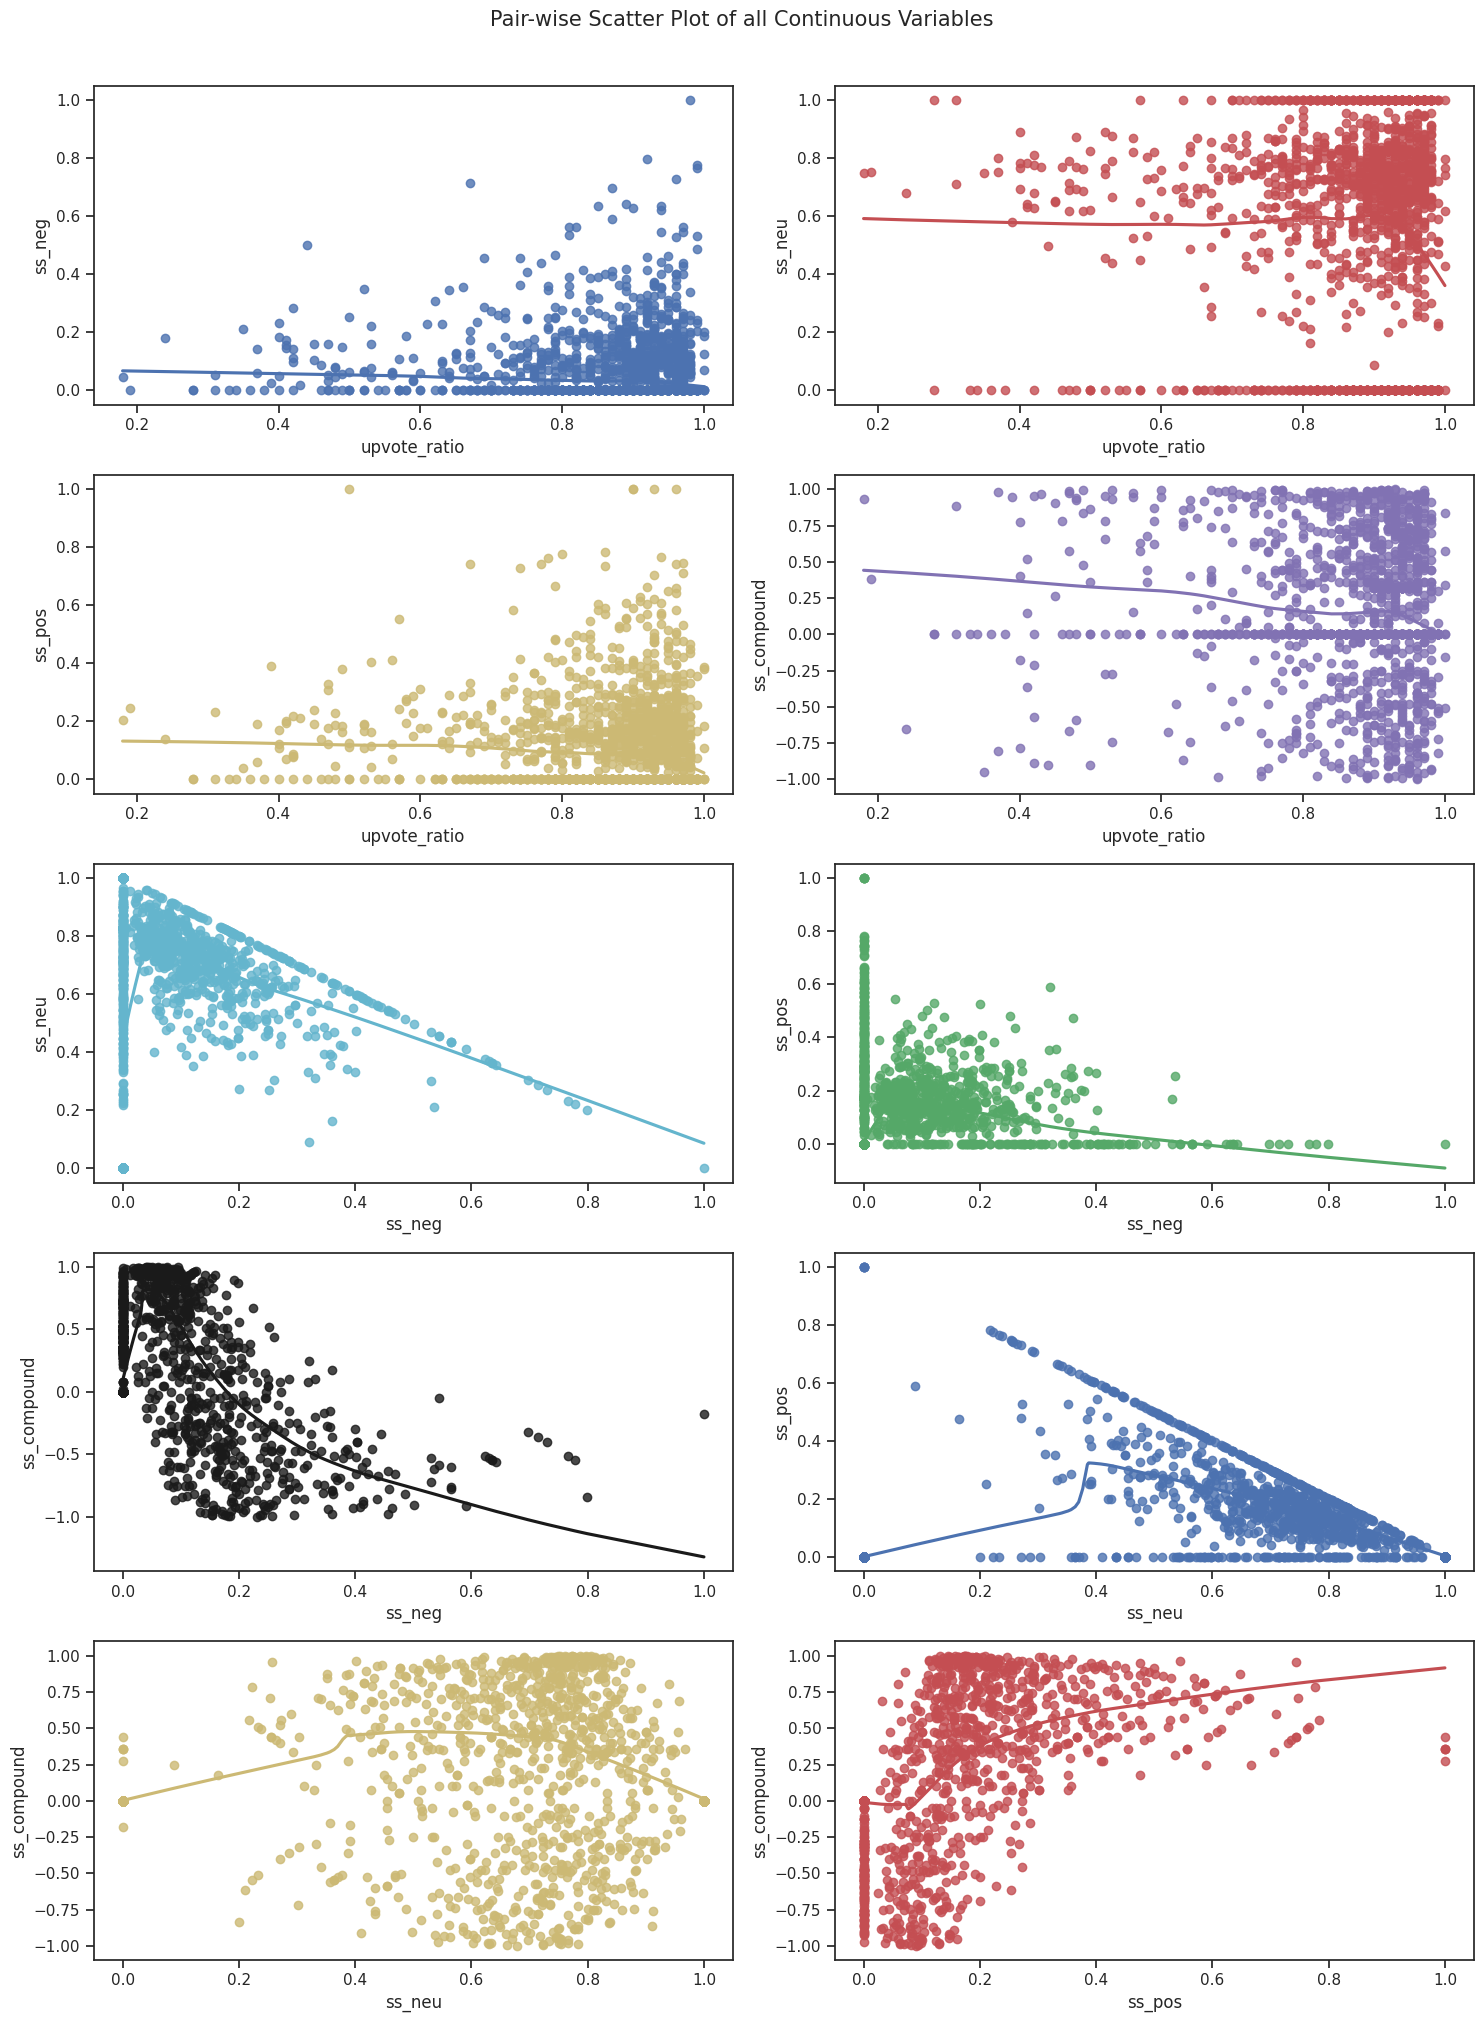

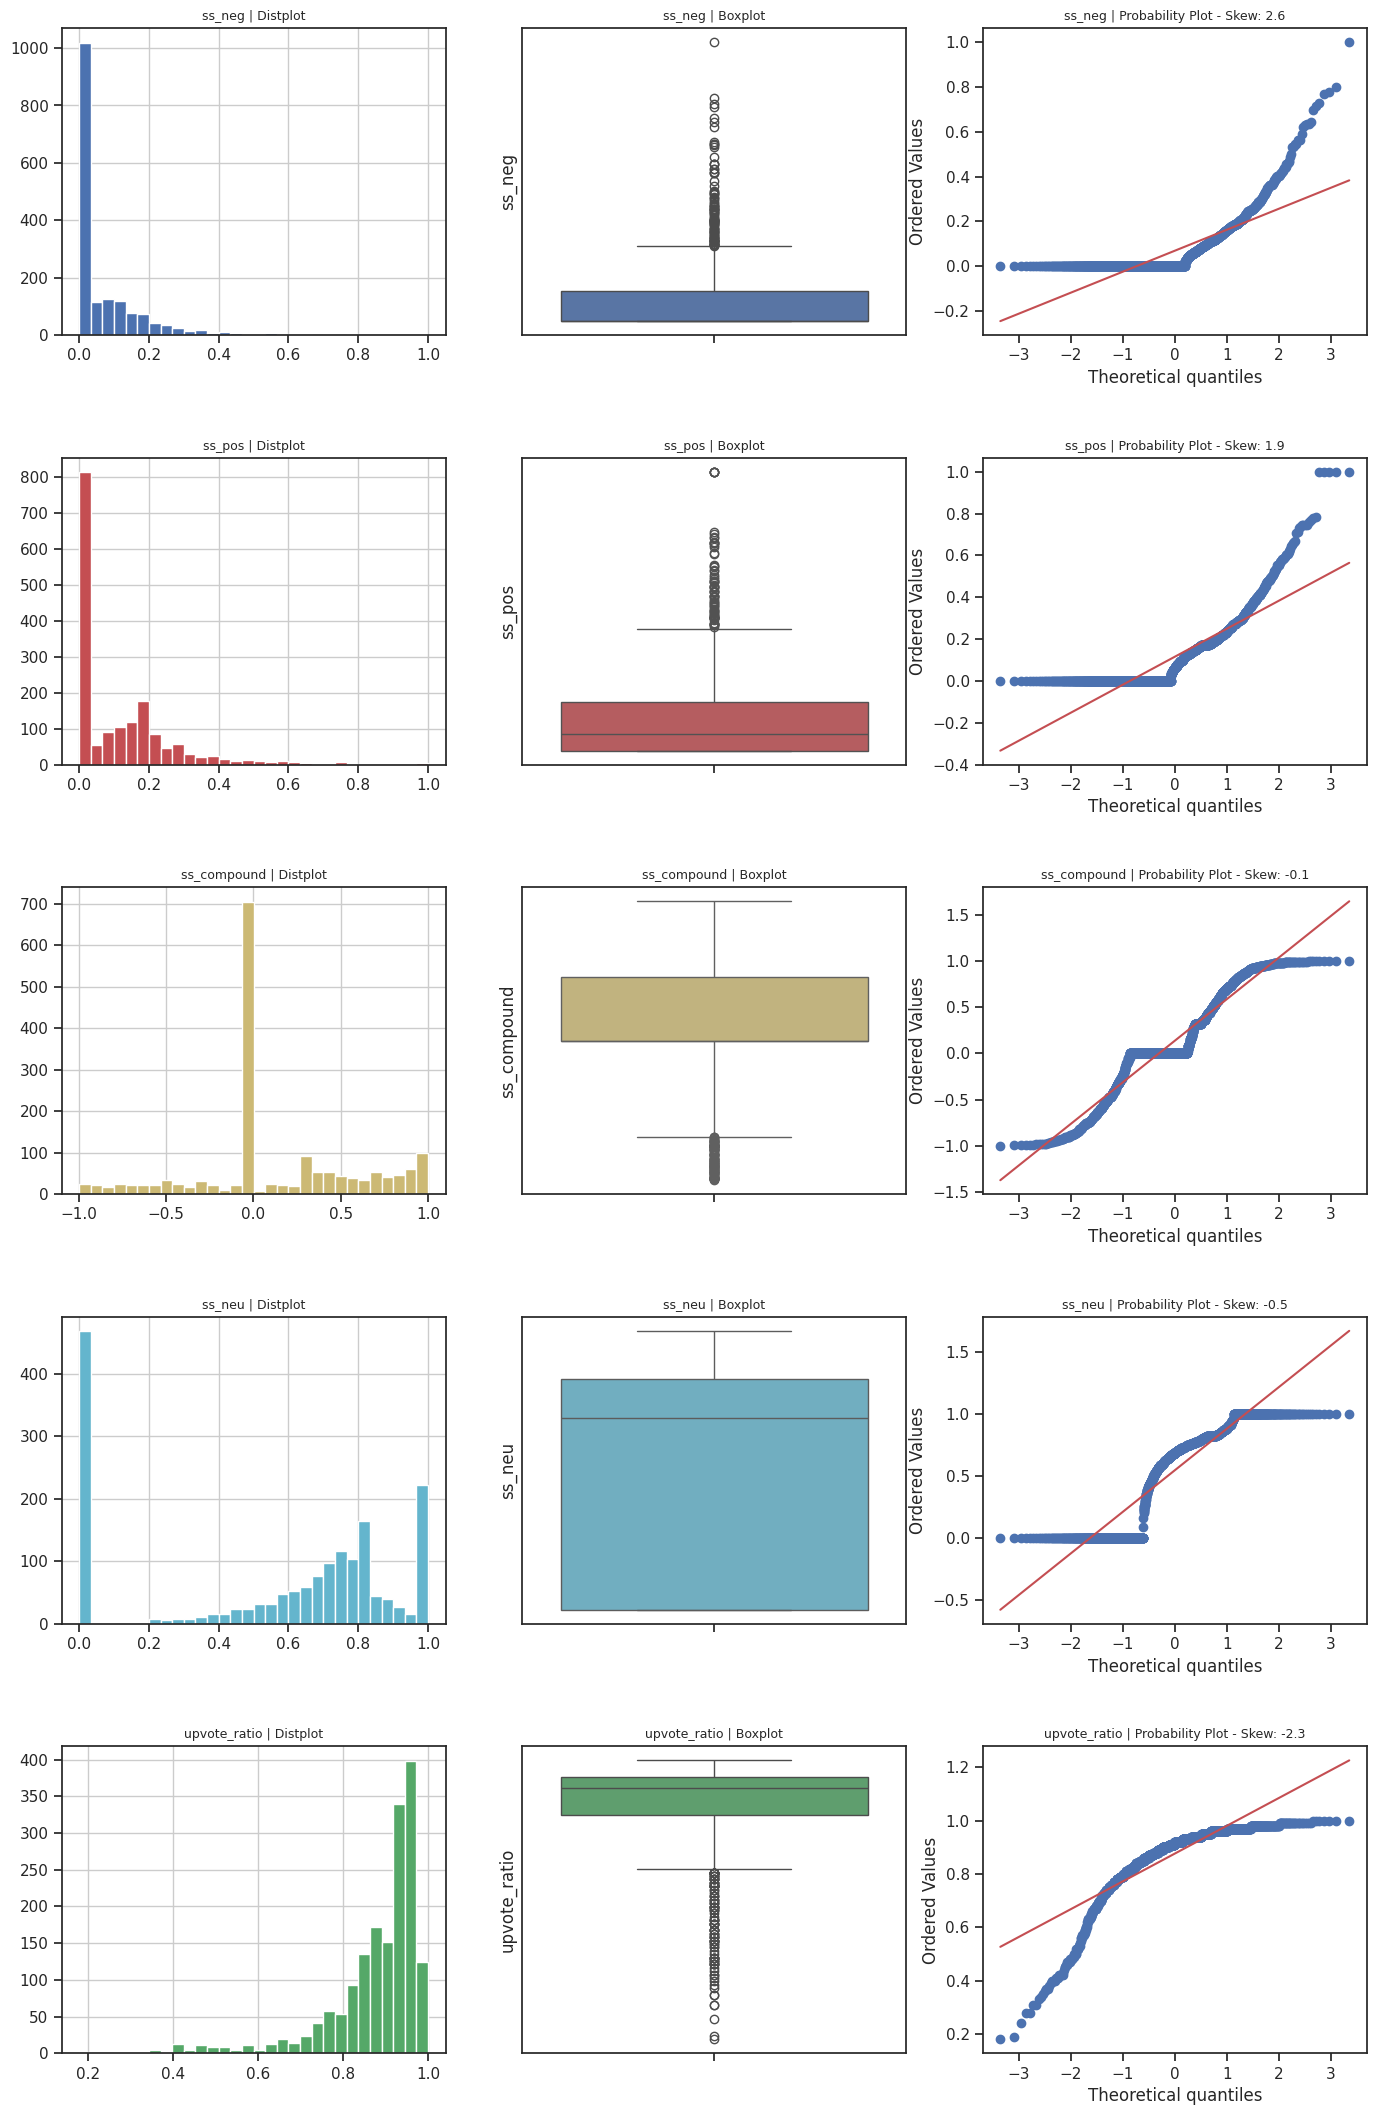

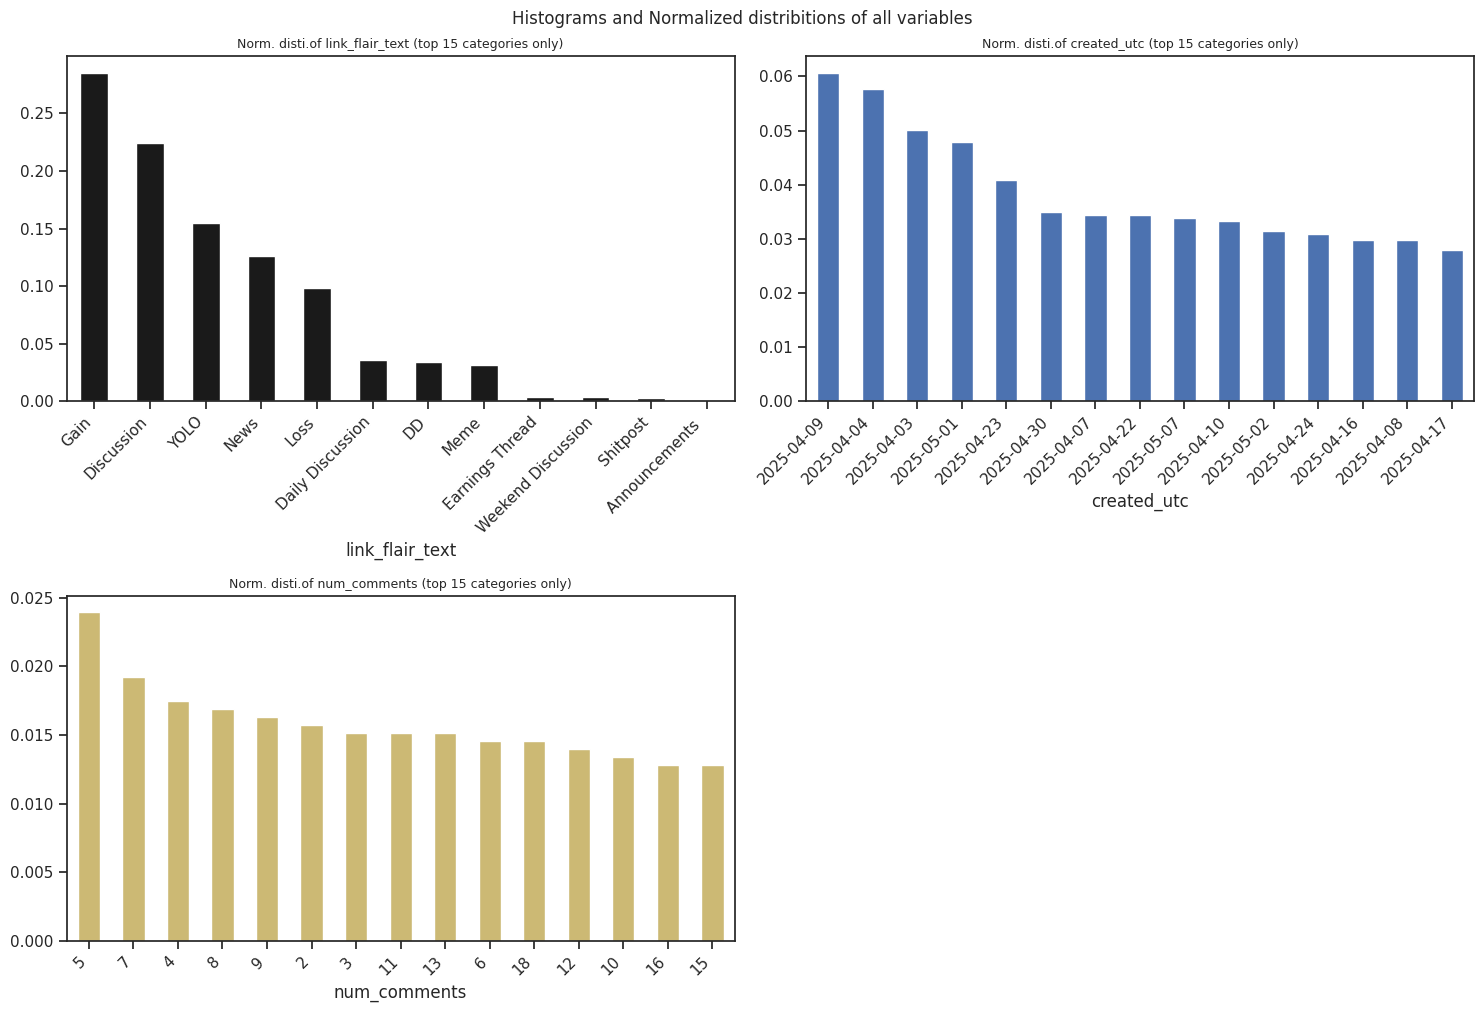

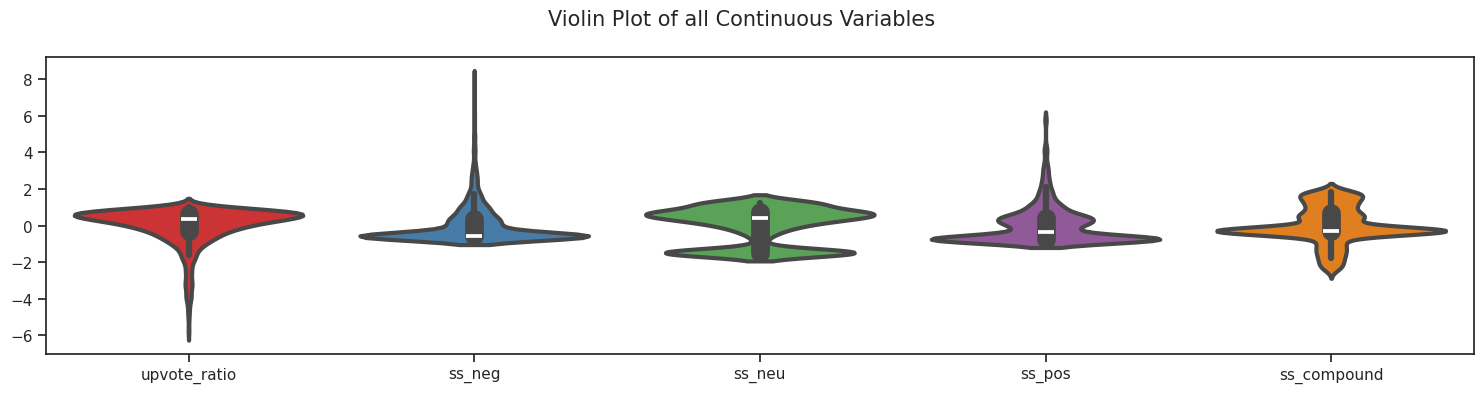

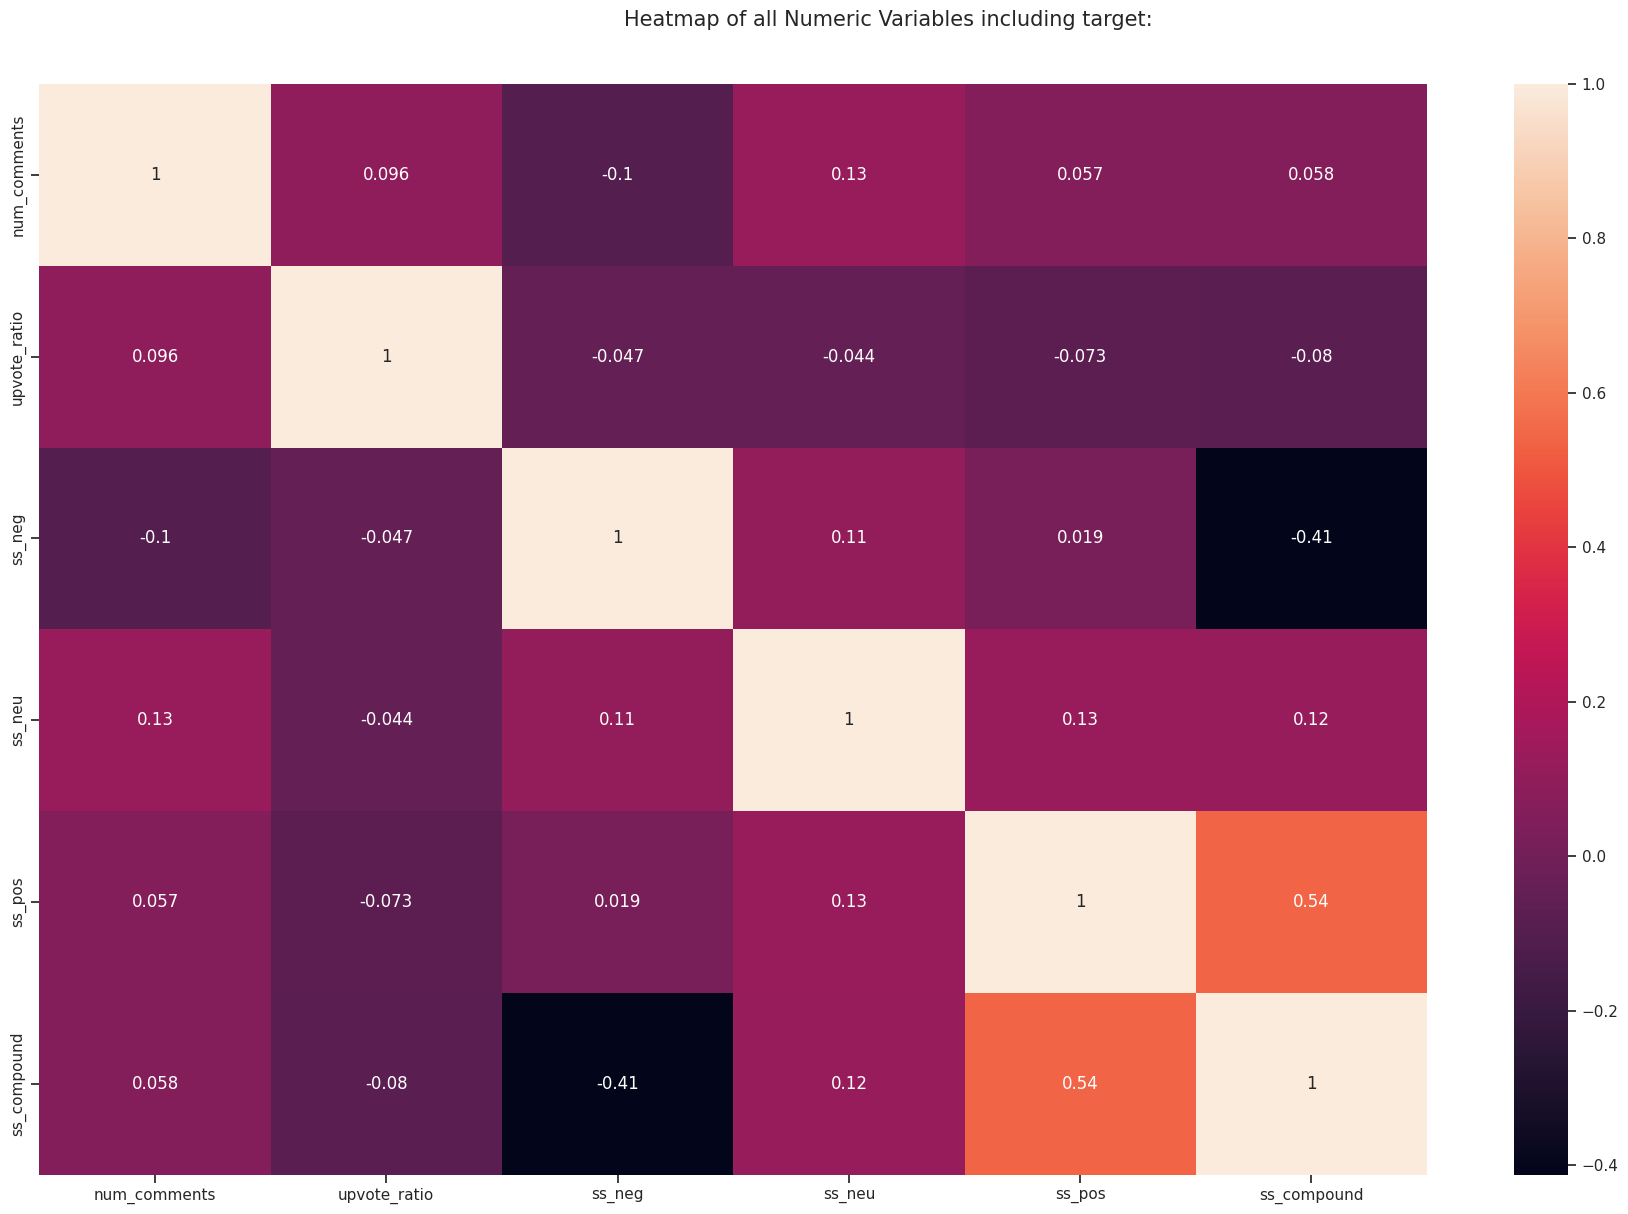

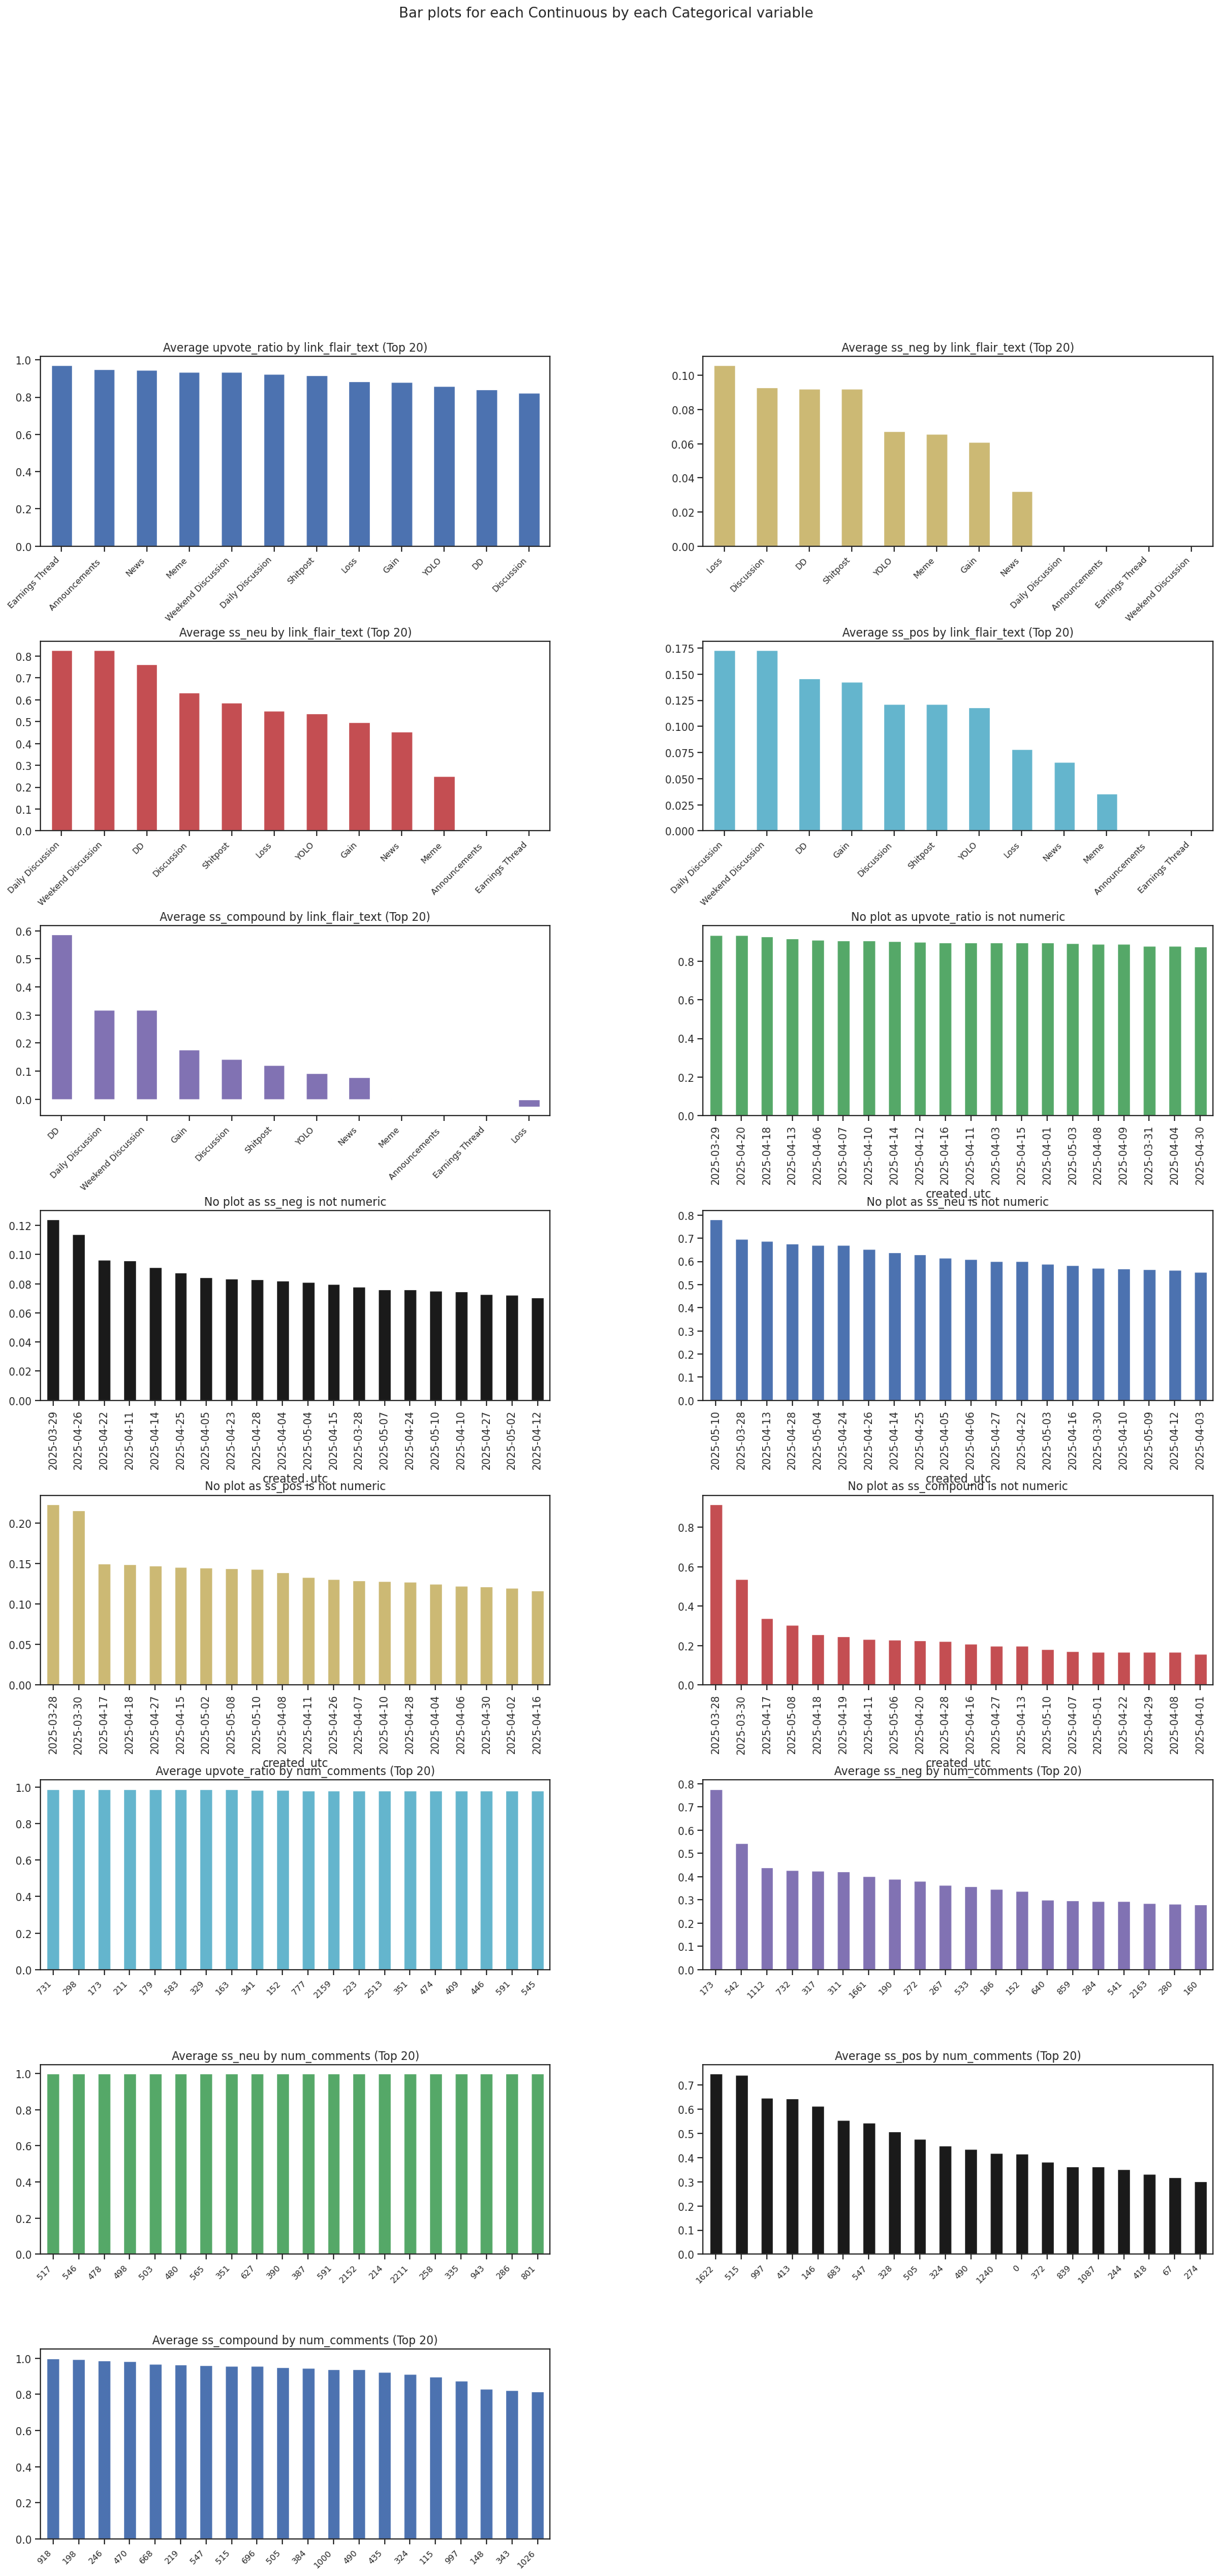

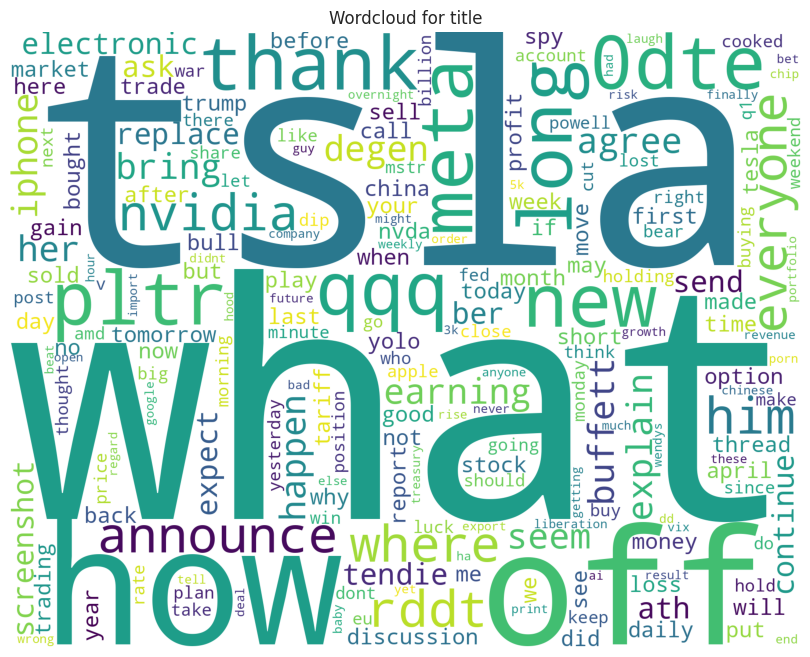

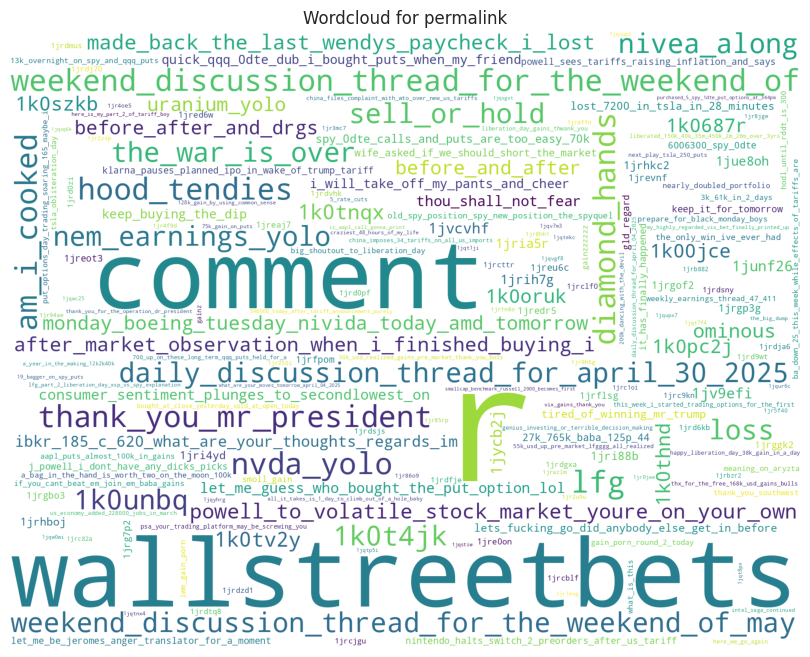

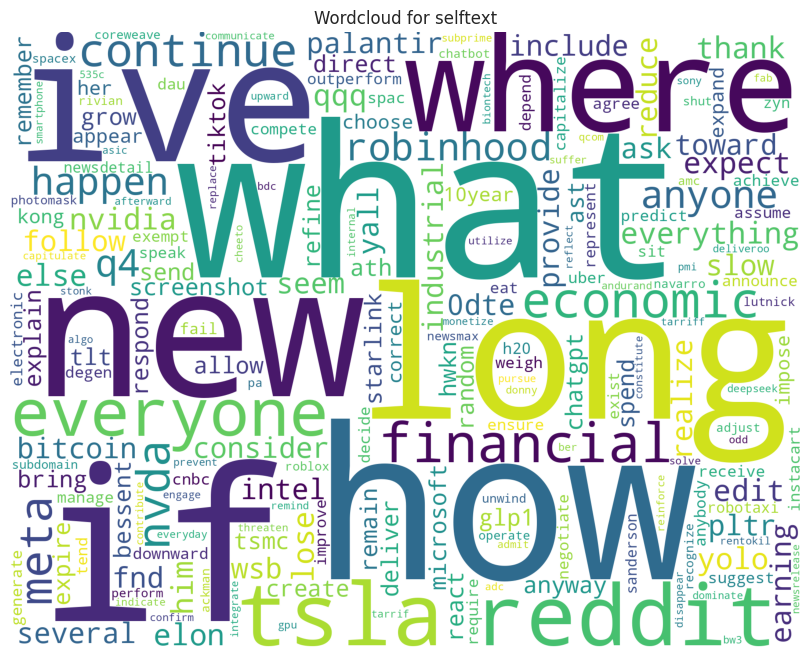

All Plots are saved in ../plots/submission/AutoViz
Time to run AutoViz = 39 seconds 
    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['ss_neg', 'ss_neu', 'ss_pos', 'ss_compound']
    Integer-Categorical Columns: ['score']
    String-Categorical Columns: ['comment_id', 'created_utc']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: ['body', 'parent_post_id', 'parent_comment_id', 'author']
    Date Time Columns: []
    ID Columns: 

Number of All Scatter Plots = 10


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!

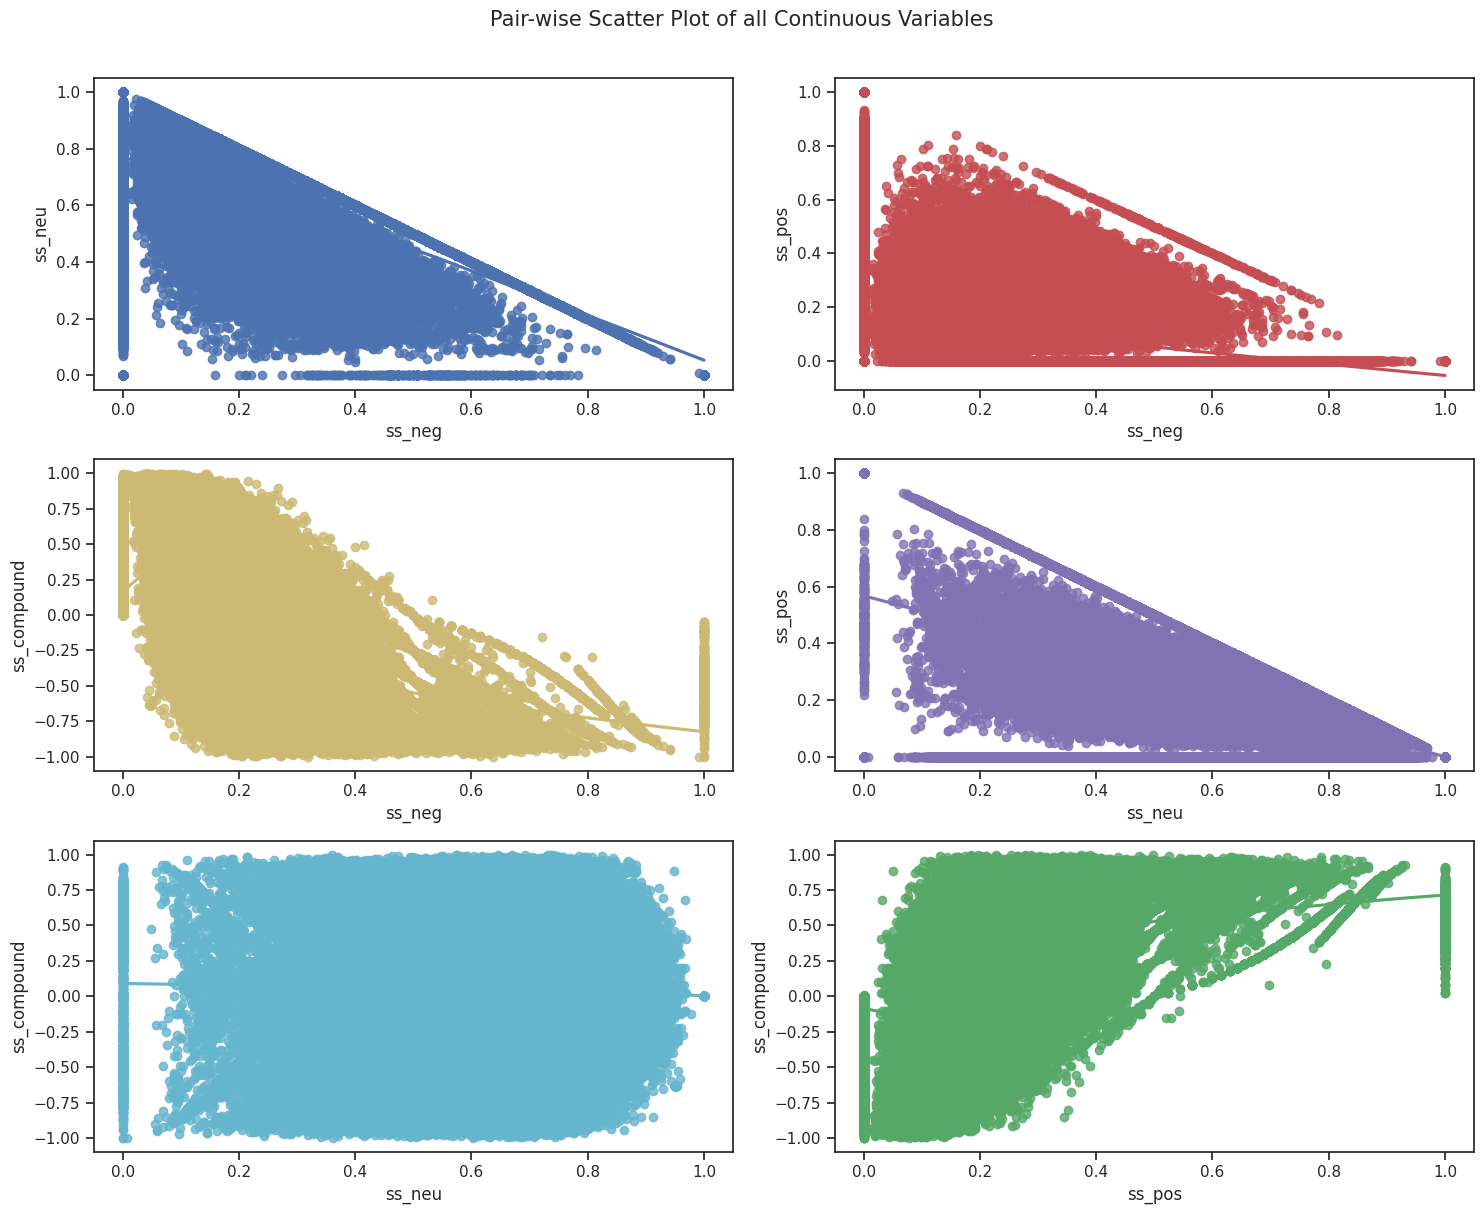

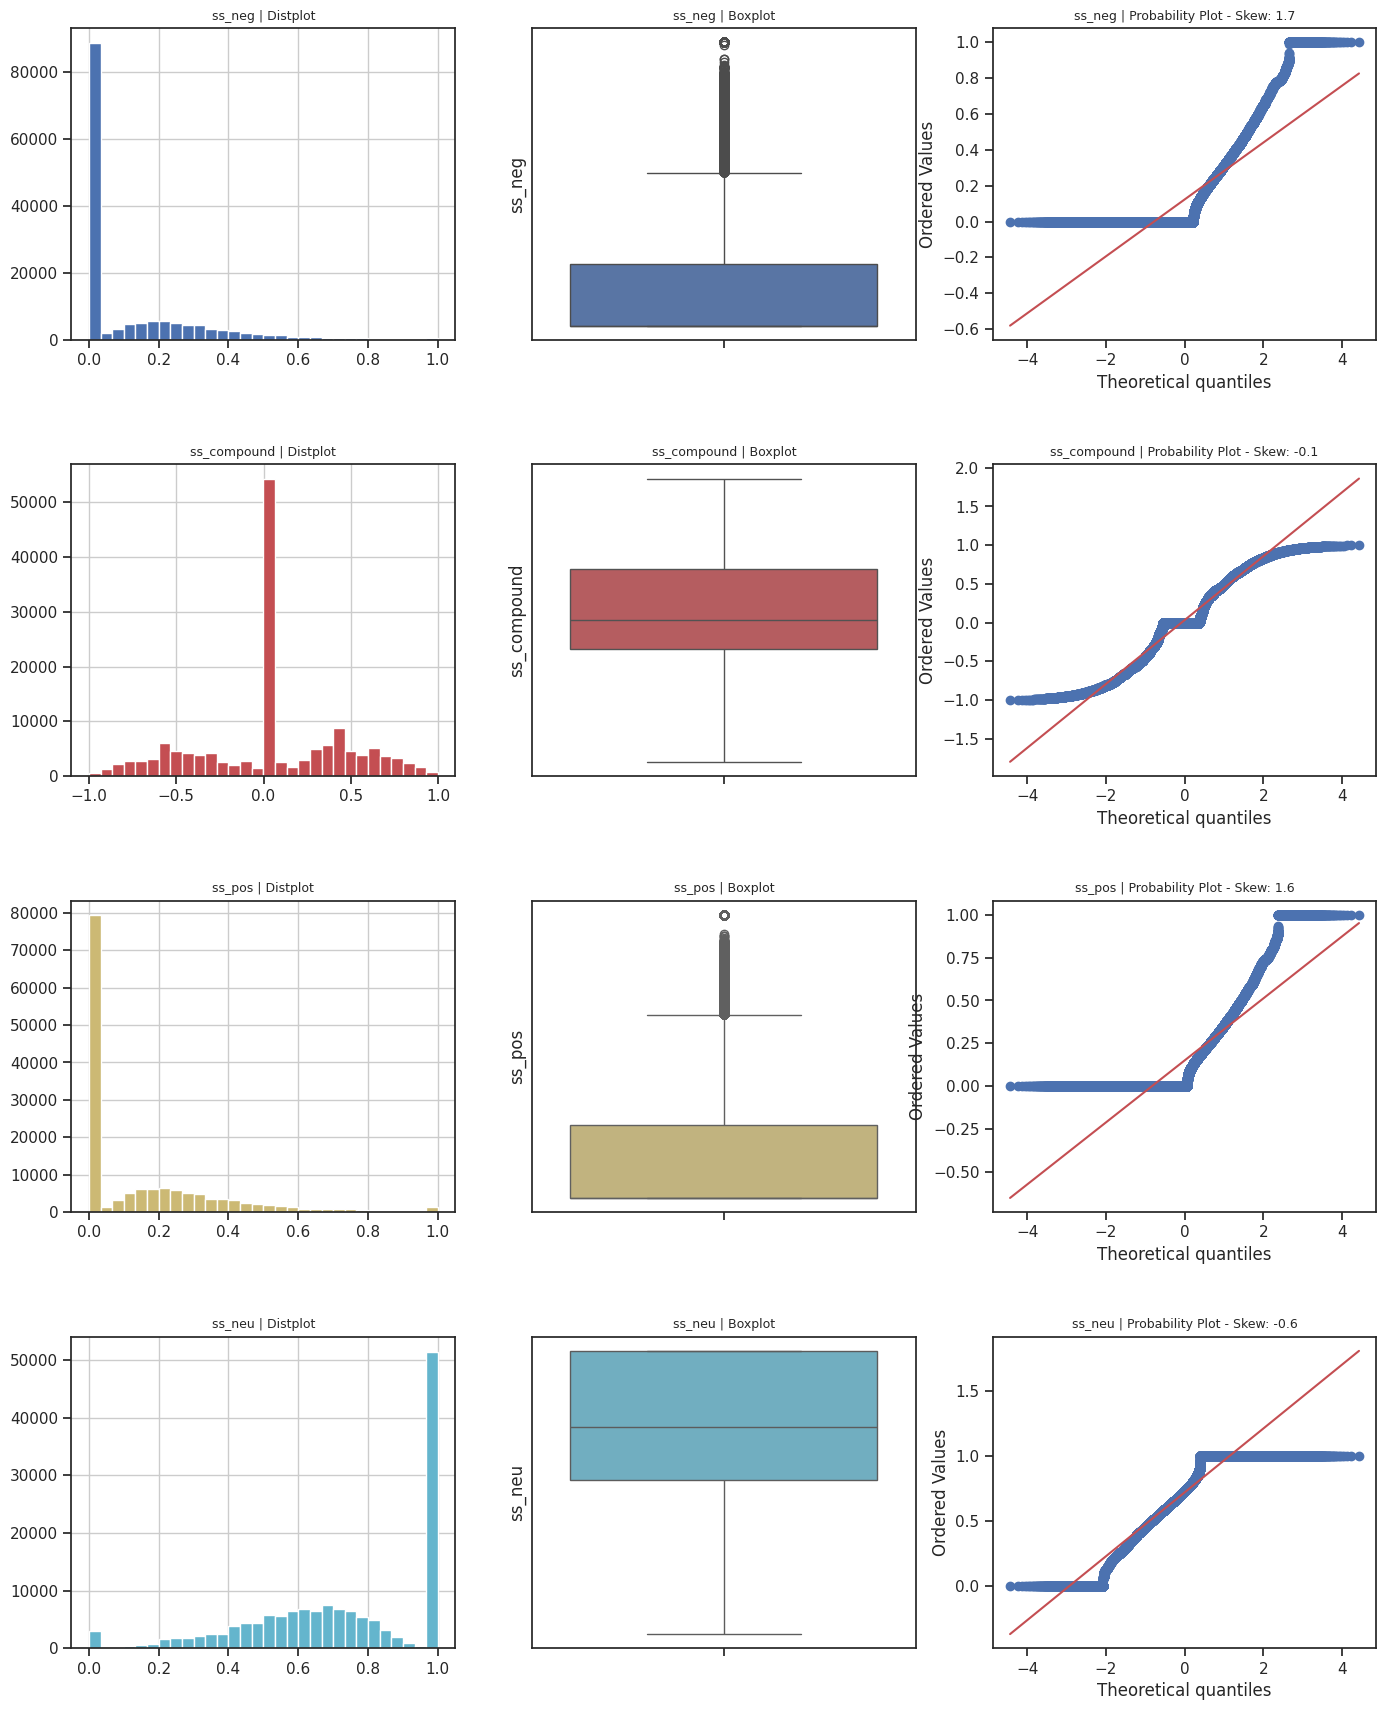

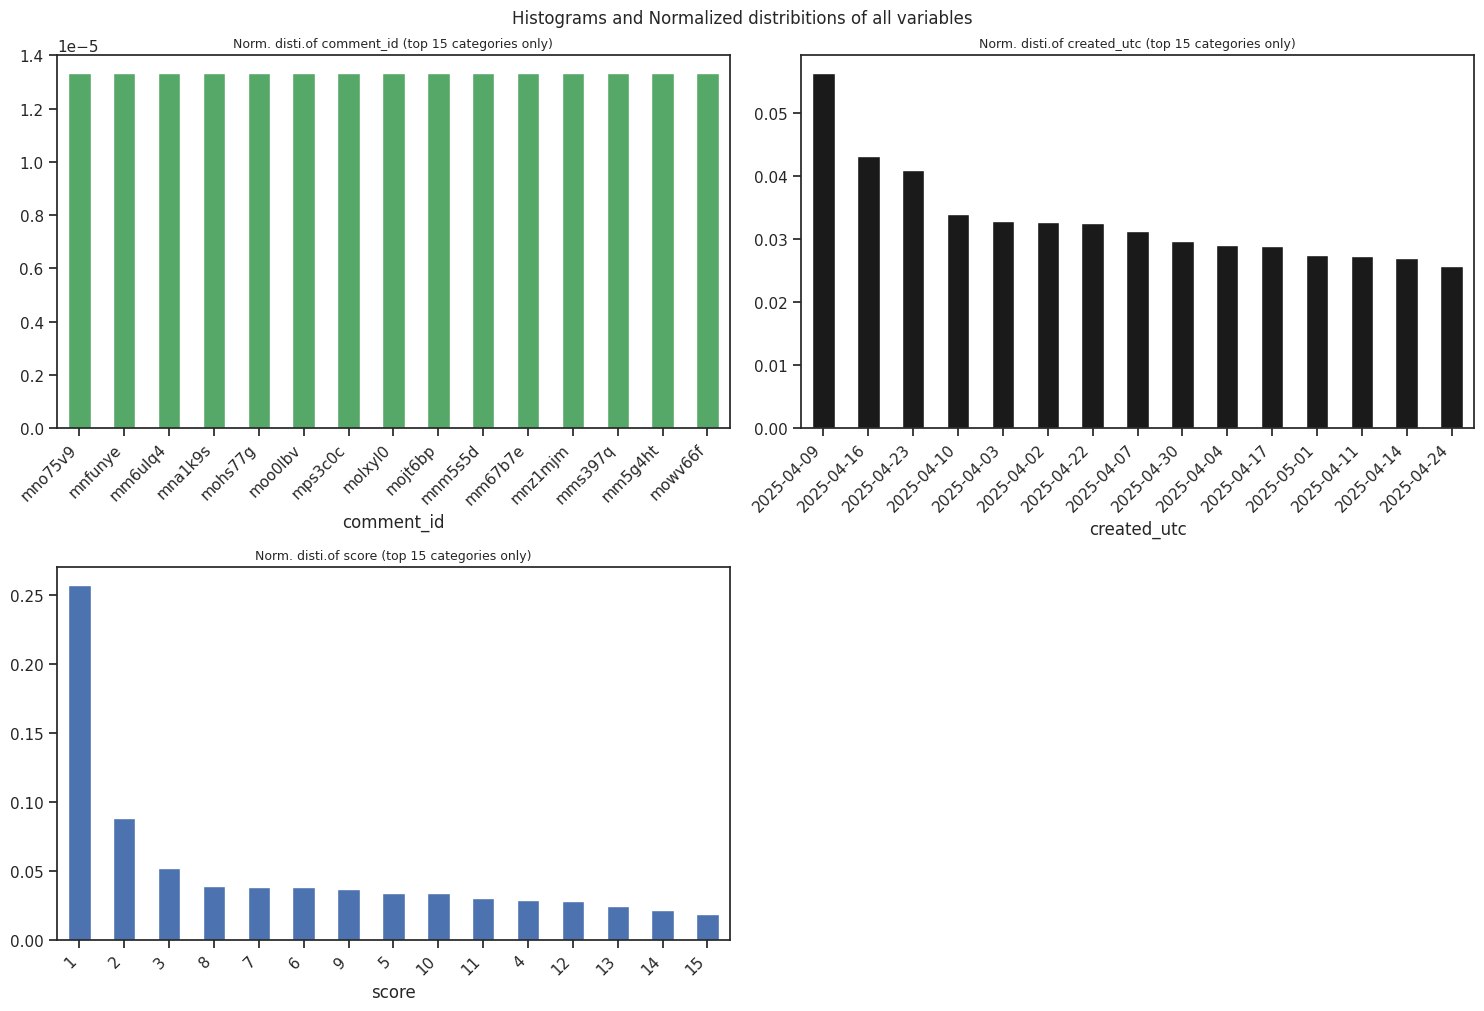

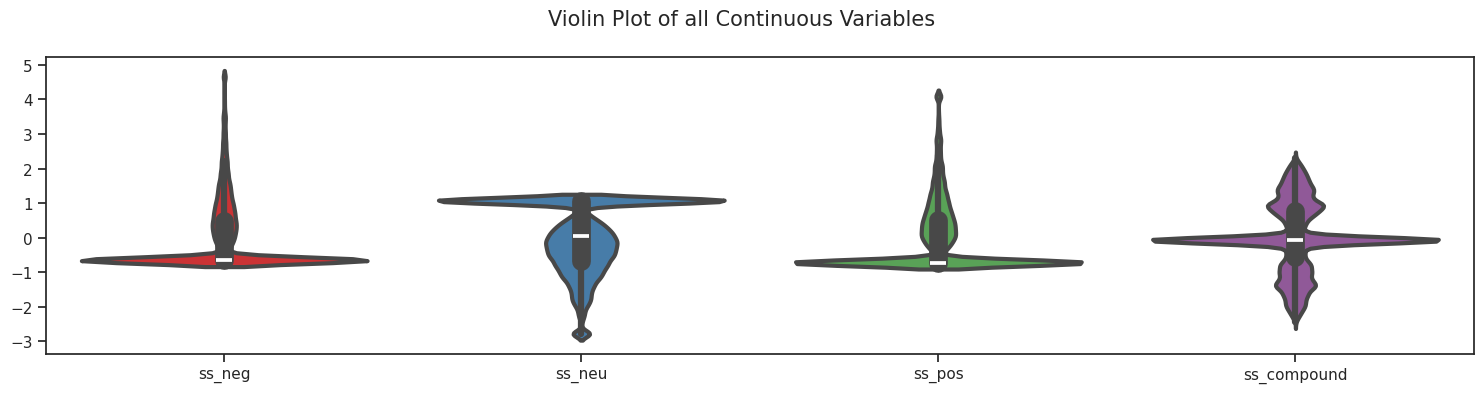

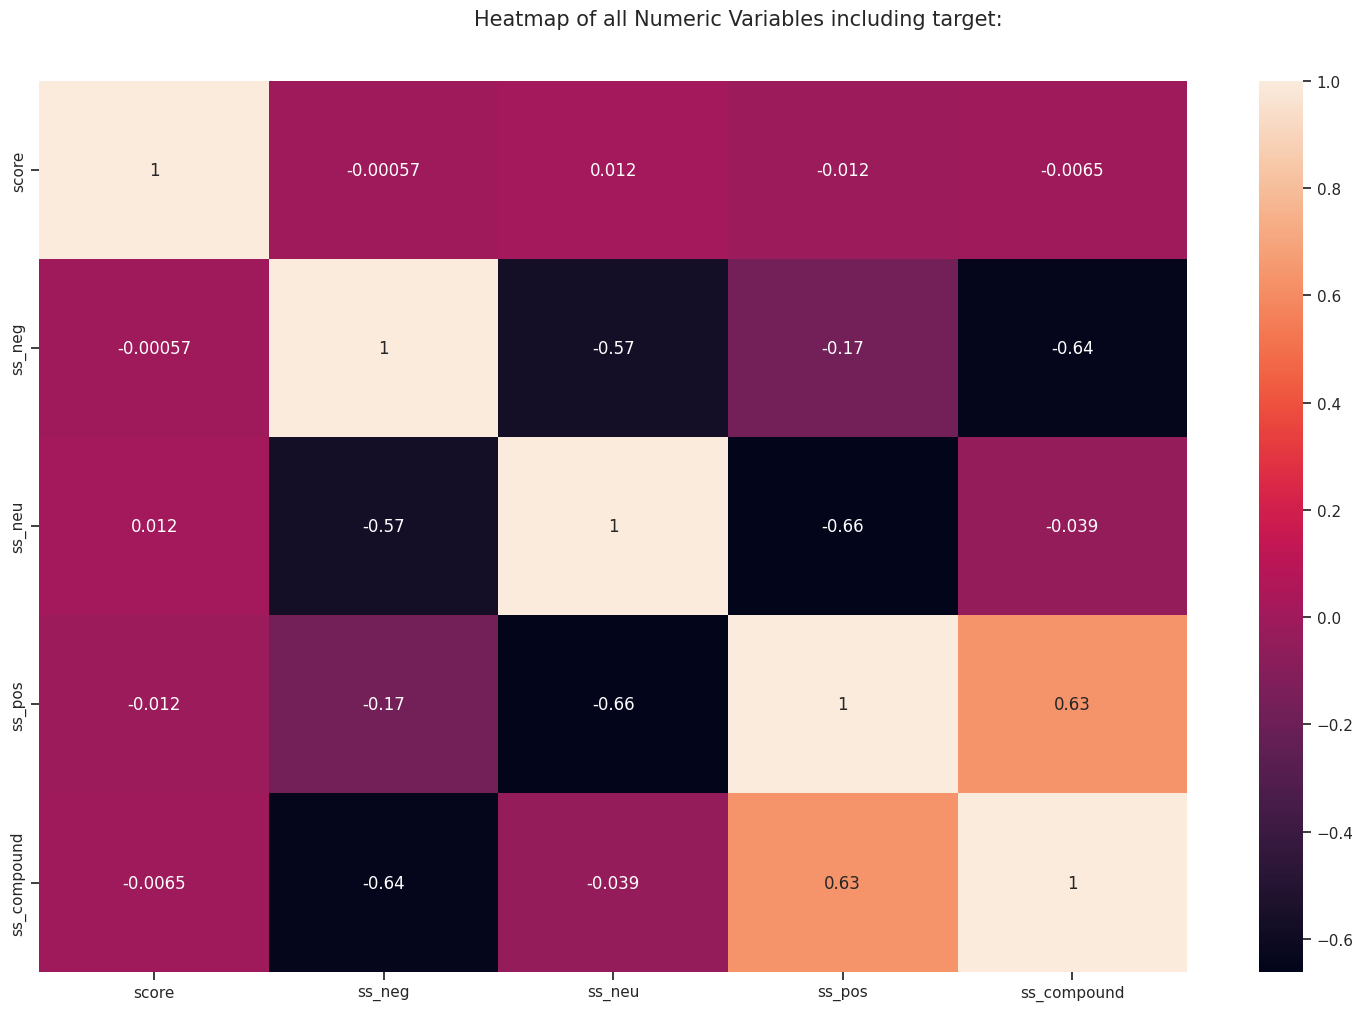

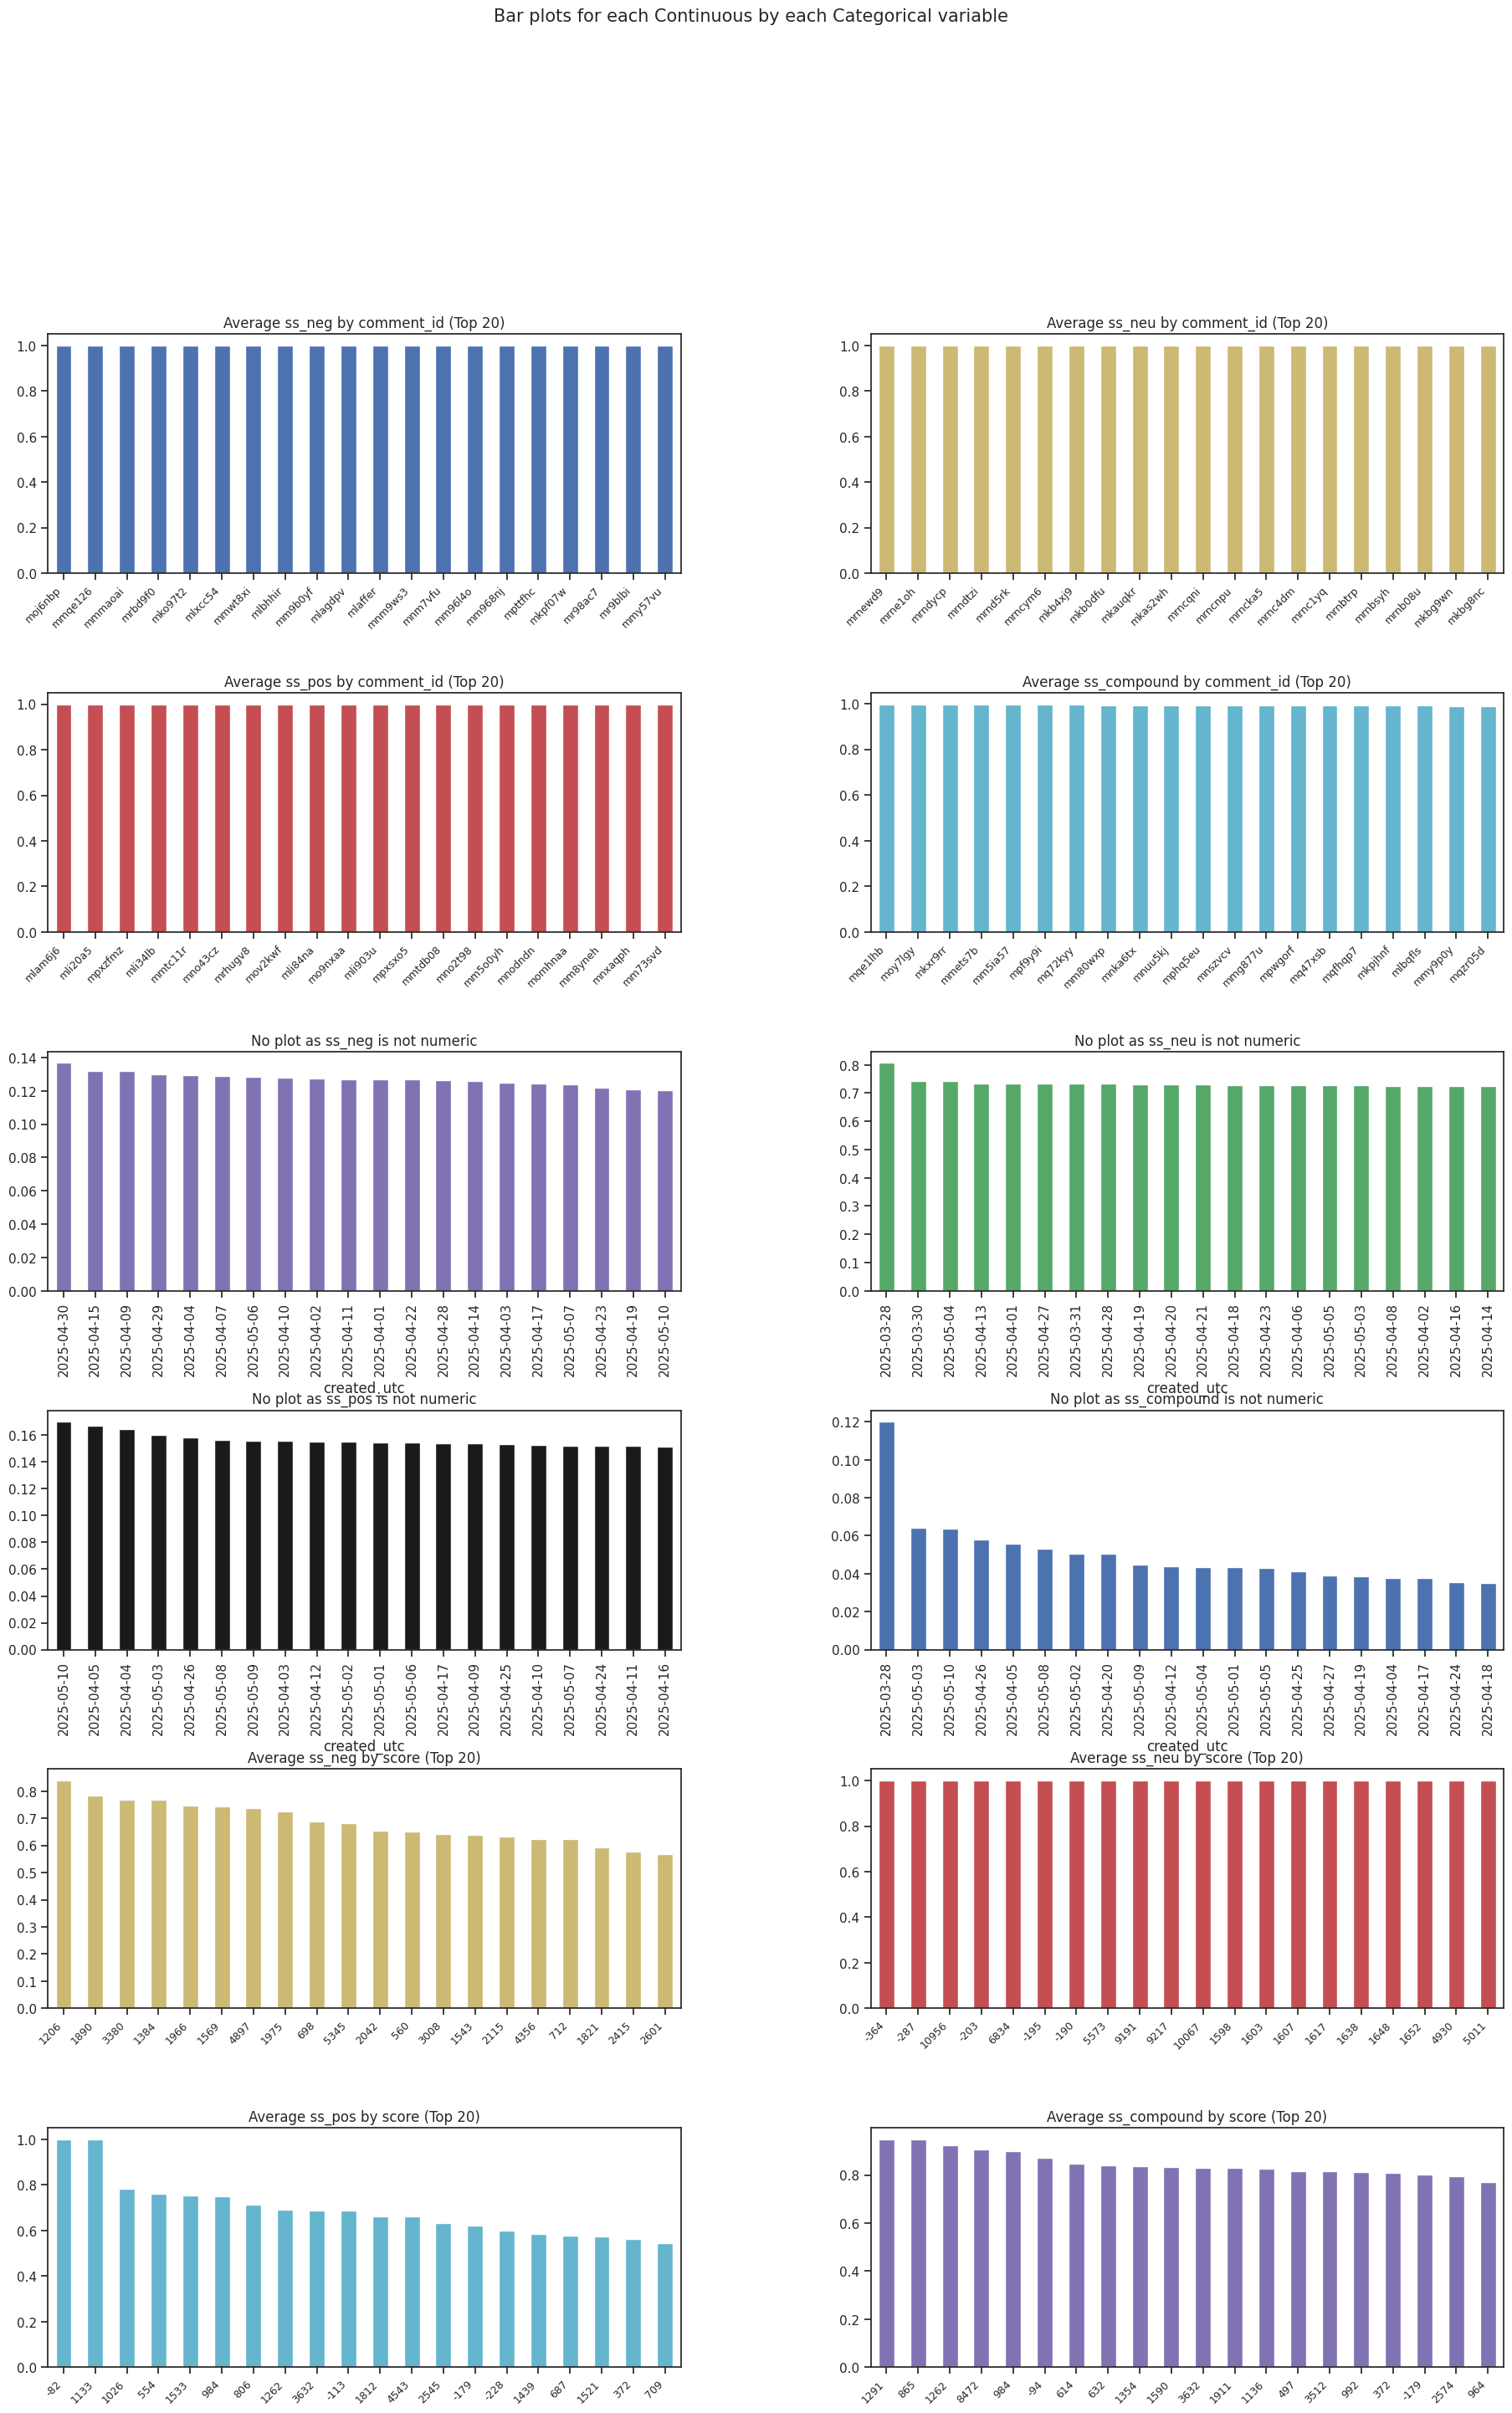

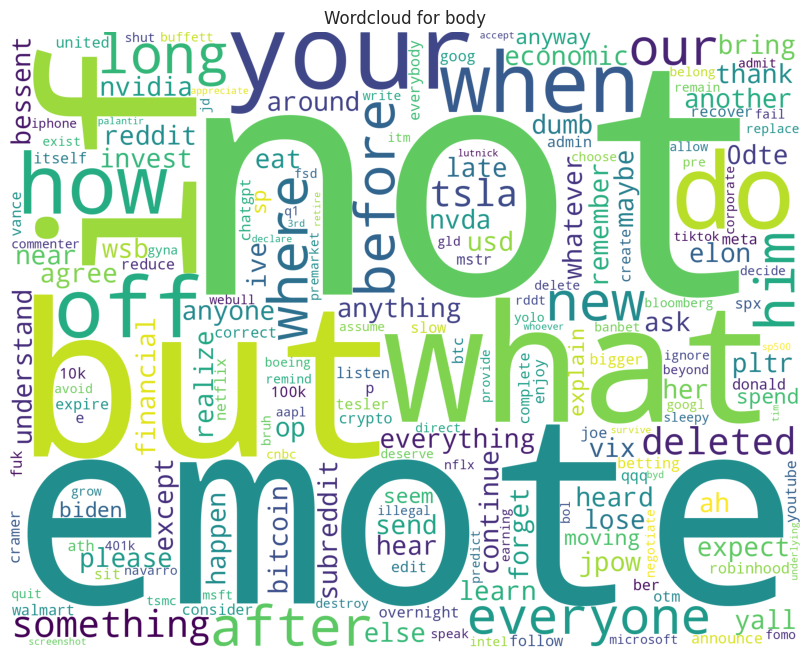

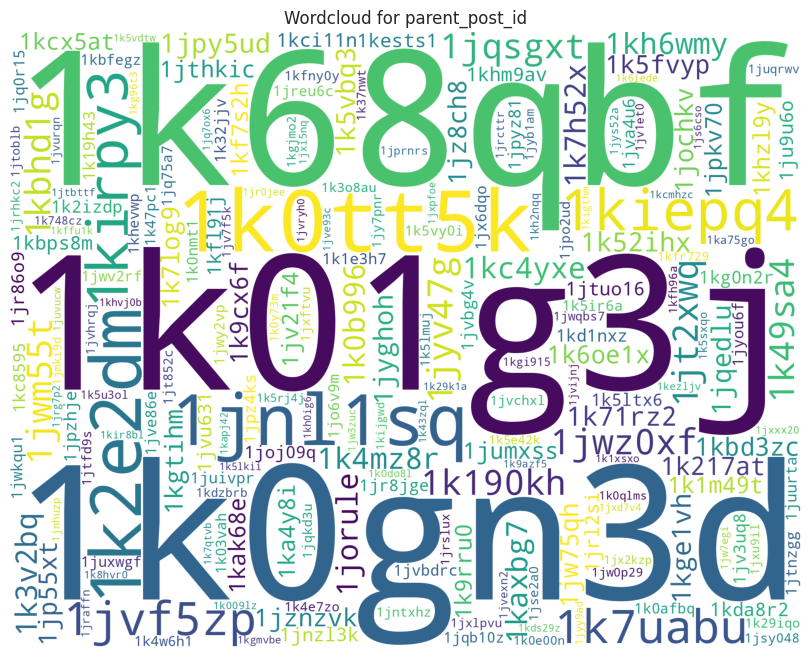

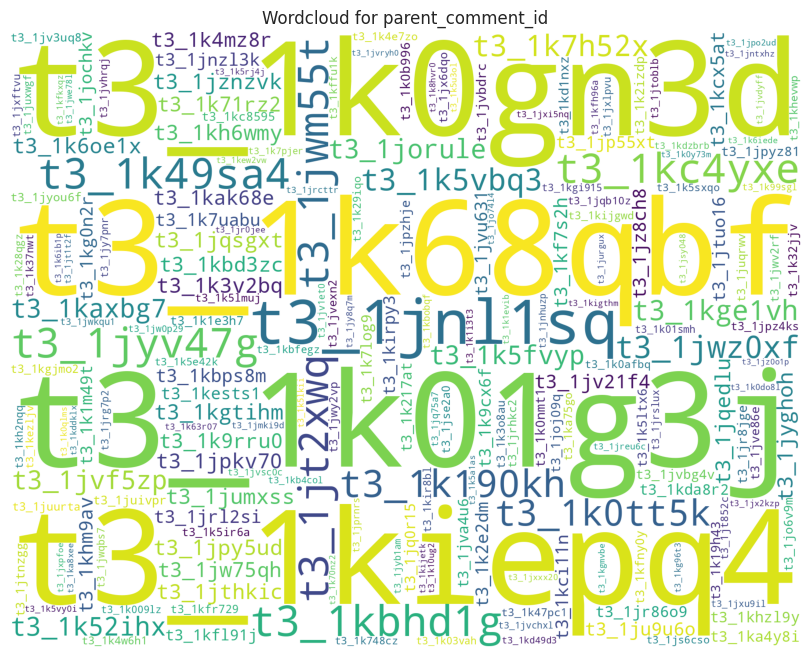

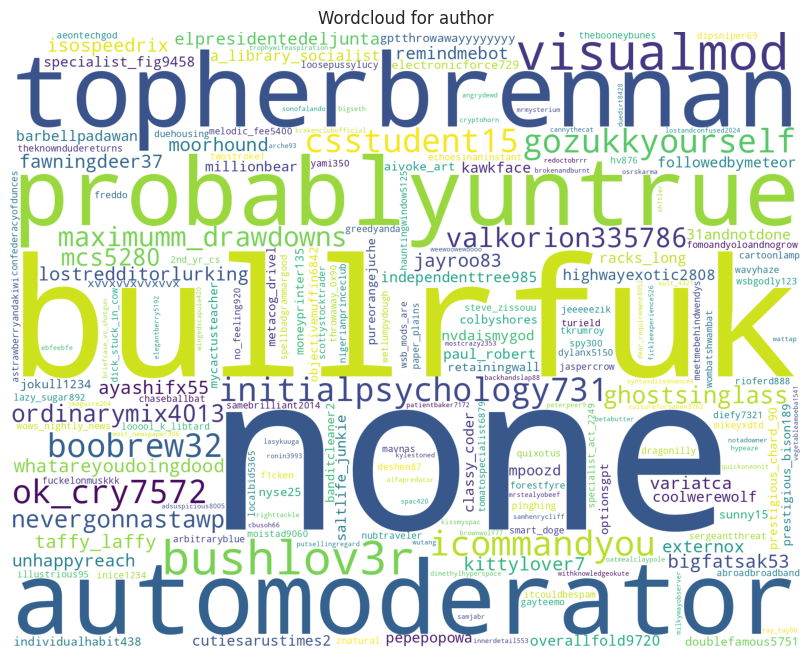

All Plots are saved in ../plots/comment/AutoViz
Time to run AutoViz = 183 seconds 
Shape of your Data Set loaded: (26452, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['upvote_ratio']
    Integer-Categorical Columns: ['num_comments']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: ['created_utc']
    NLP text Columns: ['title', 'permalink', 'selftext']
    Date Time Columns: []
    ID Columns: ['id']
    Columns that will not be considered in modeling: []
    7 Predictors classified...
        1 variable(s) removed since they were ID or low-inform

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/bengr/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!

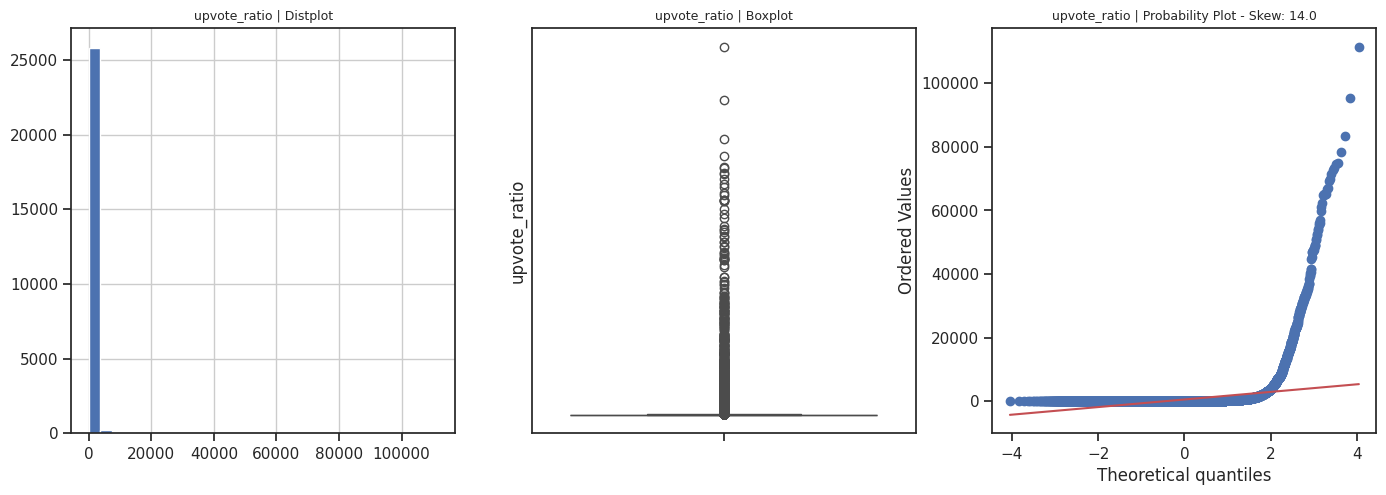

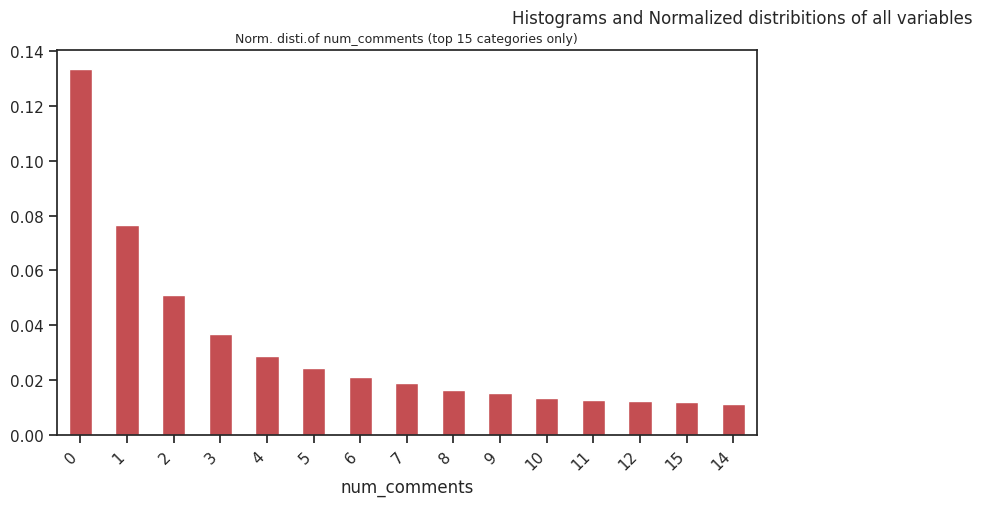

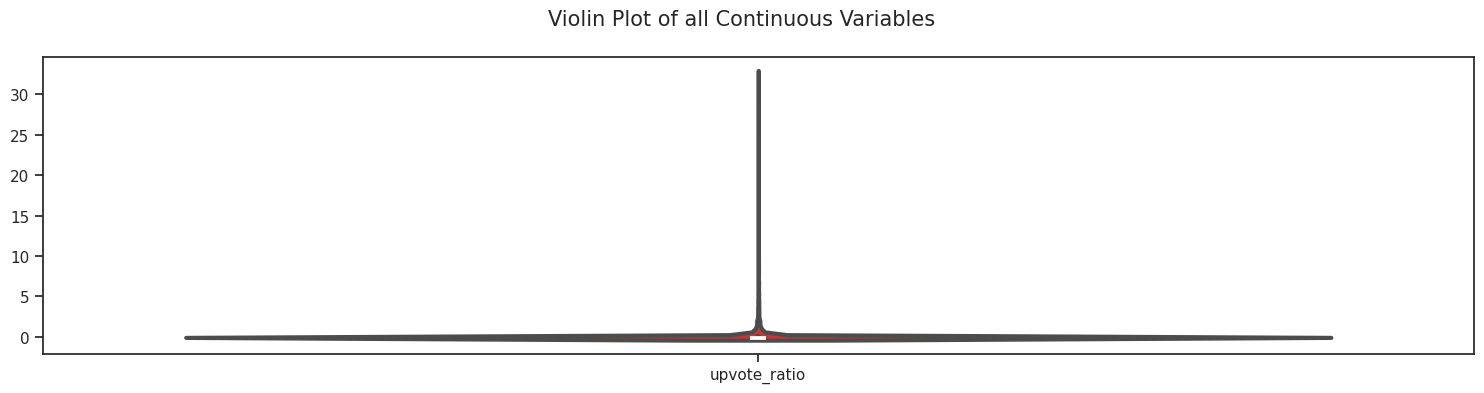

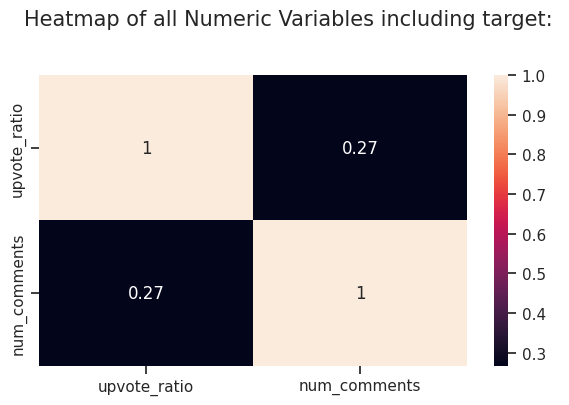

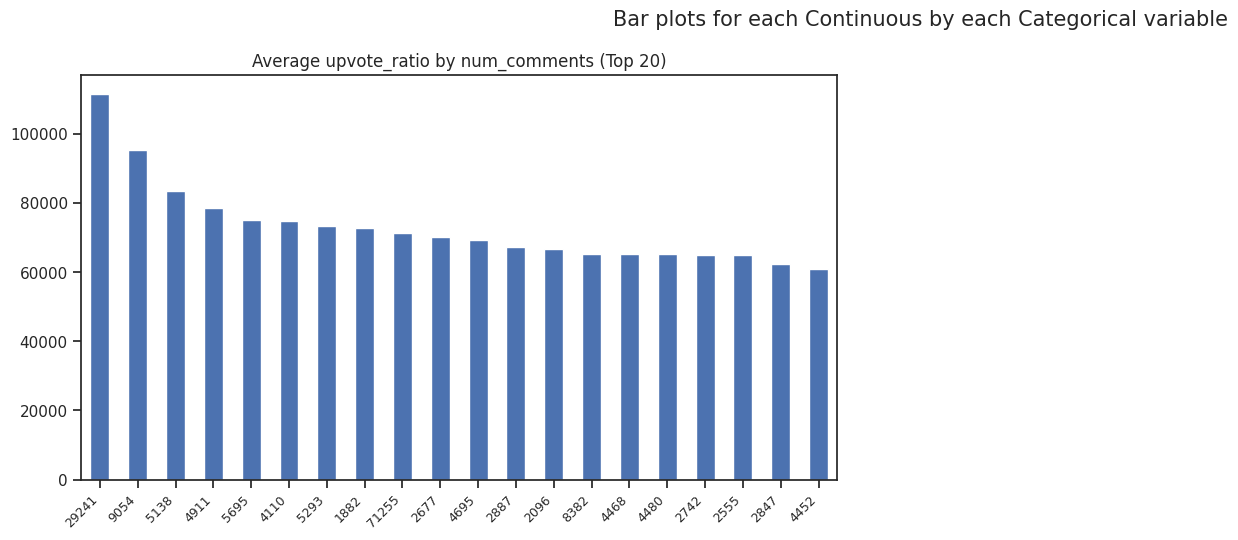

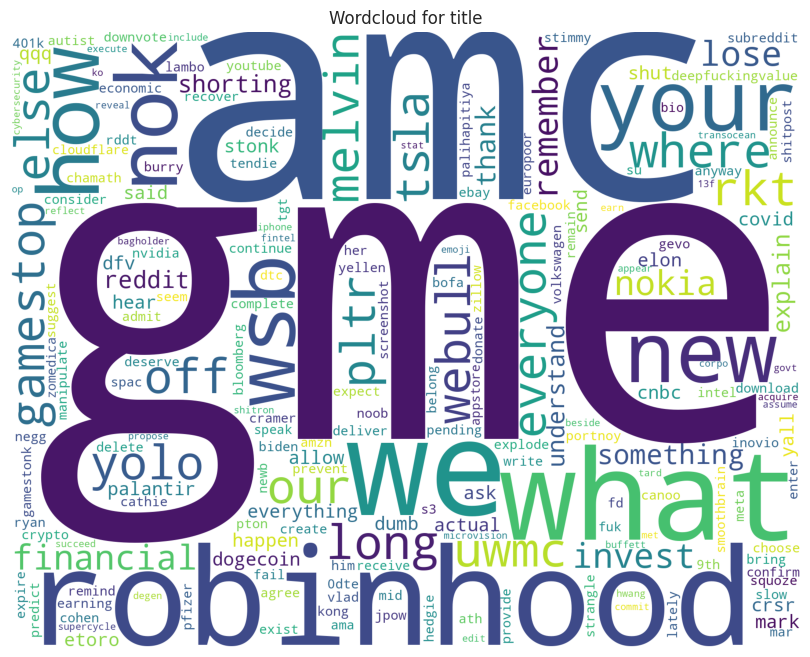

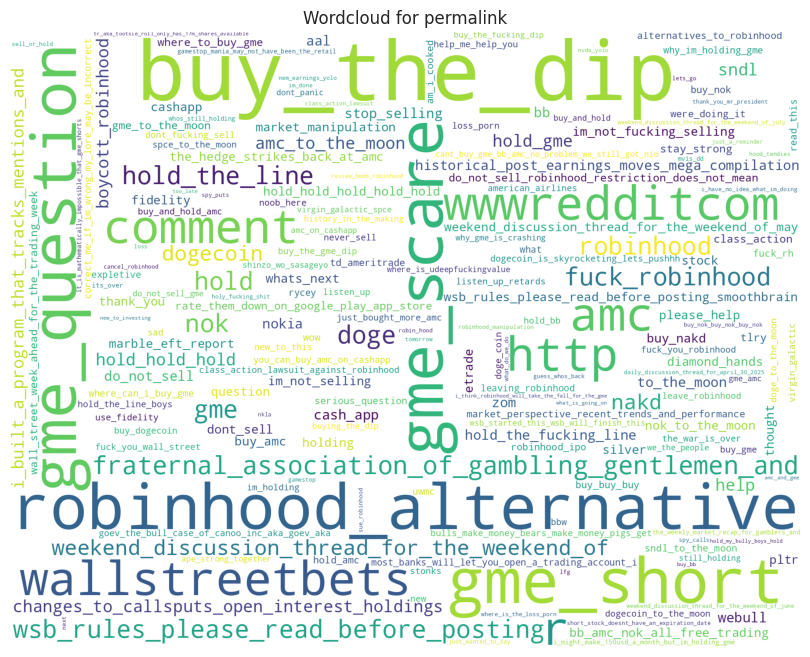

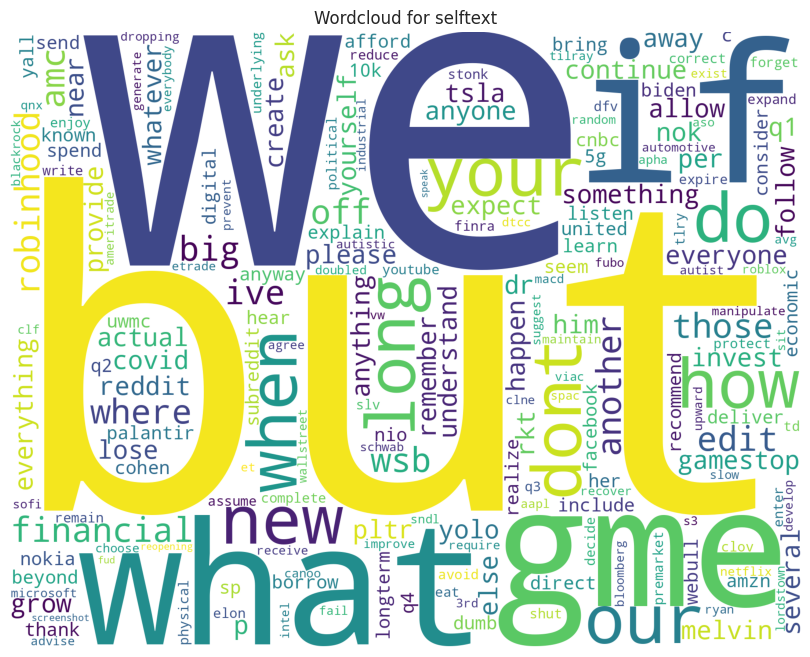

Could not draw wordcloud plot for created_utc. 'str' object cannot be interpreted as an integer
All Plots are saved in ../plots/merged/AutoViz
Time to run AutoViz = 88 seconds 


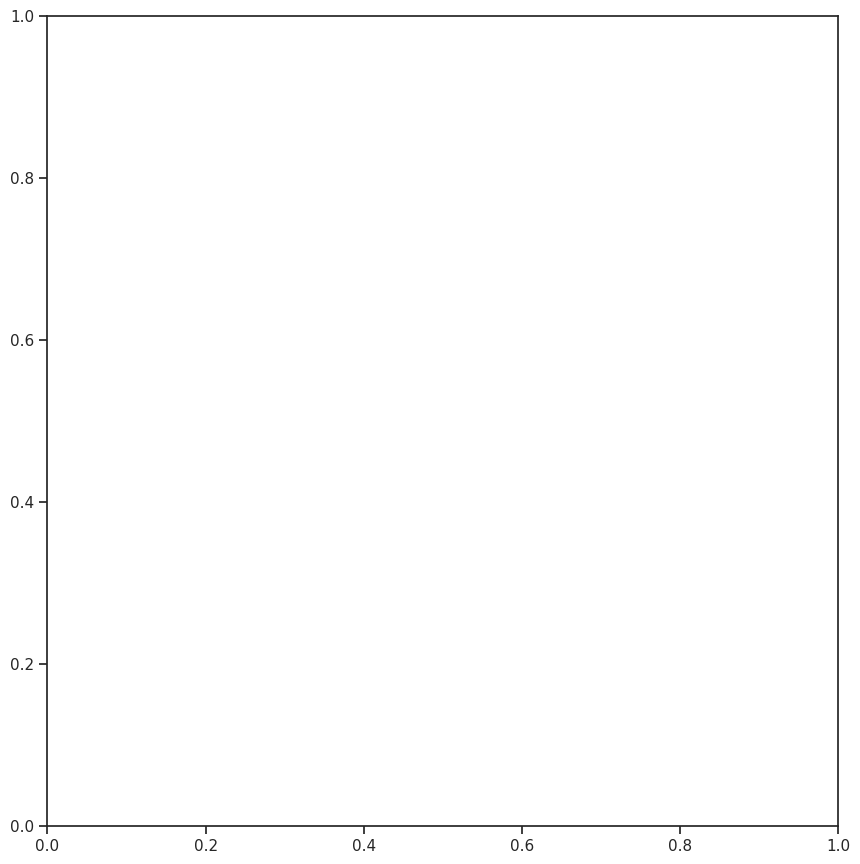

title                                                                      \
0                                                                                                                                       Nivea Along   
1                                                                                      Powell to Volatile Stock Market: You’re on Your Own, for Now   
2                                                                                                        Made back the last Wendy’s paycheck I lost   
3      After market observation. When I finished buying, I saw that the air line was changing. I thought the combination of both sides was more rea   
4                                                                                                                                           Ominous   
...                                                                                                                                             ...   
54895                                                                                                            Ten Year Price Prediction for TSLA   
54896                                                                                               What I Learned Investigating SAVA FUD Spreaders   
54897                                                                           Daily Popular Tickers Thread for August 02, 2021 - BABA | GME | AMD   
54899                                                                                                   Daily Discussion Thread for August 02, 2021   
54900                                                         Fraternal Association of Gambling Gentlemen and Yacht Degenerates for August 02, 2021   

       upvote_ratio    id     \
0           0.67     1k0t4jk   
1           0.86     1k0unbq   
2           0.94     1k0tv2y   
3           0.72     1k0tnqx   
4           0.85     1k0thnd   
...             ...      ...   
54895     156.00      owfbxp   
54896     238.00      owd2pn   
54897     228.00      owd1a5   
54899     338.00      owbfjf   
54900      40.00      owaqd6   

                                                      permalink                                                  \
0                                                               /r/wallstreetbets/comments/1k0t4jk/nivea_along/   
1                         /r/wallstreetbets/comments/1k0unbq/powell_to_volatile_stock_market_youre_on_your_own/   
2                                 /r/wallstreetbets/comments/1k0tv2y/made_back_the_last_wendys_paycheck_i_lost/   
3                         /r/wallstreetbets/comments/1k0tnqx/after_market_observation_when_i_finished_buying_i/   
4                                                                   /r/wallstreetbets/comments/1k0thnd/ominous/   
...                                                                                                         ...   
54895               https://www.reddit.com/r/wallstreetbets/comments/owfbxp/ten_year_price_prediction_for_tsla/   
54896  https://www.reddit.com/r/wallstreetbets/comments/owd2pn/what_i_learned_investigating_sava_fud_spreaders/   
54897  https://www.reddit.com/r/wallstreetbets/comments/owd1a5/daily_popular_tickers_thread_for_august_02_2021/   
54899       https://www.reddit.com/r/wallstreetbets/comments/owbfjf/daily_discussion_thread_for_august_02_2021/   
54900  https://www.reddit.com/r/wallstreetbets/comments/owaqd6/fraternal_association_of_gambling_gentlemen_and/   

       num_comments created_utc  \
0              5     2025-04-16   
1              2     2025-04-16   
2              6     2025-04-16   
3              8     2025-04-16   
4            110     2025-04-16   
...             ...         ...   
54895        204     2021-08-02   
54896         87     2021-08-02   
54897       1070     2021-08-02   
54899      11688     2021-08-02   
54900        810     2021-08-02   

                                                                          

In [ ]:
visualize_data(submission_collection, save_path='../plots/submission')
visualize_data(comment_collection, save_path='../plots/comment')
visualize_data(merged_dataset, save_path='../plots/merged')